In [1]:
import os
import pandas as pd
import numpy as np
from fish_helpers import *
import tqdm
import time
from scipy import sparse
import random
from ipypb import ipb
base = '/bigstore/binfo/mouse/Hippocampus/'

In [2]:
"""
Load seperability filtered counts
"""
filtered_counts_sparse = sparse.load_npz(os.path.join(base,'Allen/seperability_filtered_counts.npz'))
filtered_counts = filtered_counts_sparse.A
cells = list(pd.read_csv(os.path.join(base,'Allen/seperability_filtered_cells.csv'),index_col=0)['0'])
filtered_genes = list(pd.read_csv(os.path.join(base,'Allen/seperability_filtered_genes.csv'),index_col=0)['0'])

In [41]:
cell_type_averages = pd.read_csv(os.path.join(base,'Allen/normalized_cell_type_average_counts.csv.gz'),index_col=0)
cell_type_averages = cell_type_averages.loc[filtered_genes]

In [36]:
filtered_counts = pd.DataFrame(filtered_counts,index=filtered_genes,columns=cells)

In [33]:
metadata = pd.read_csv(os.path.join(base,'sample_annotations.csv'),index_col=0)
good_types = [i for i in metadata['cell_type_alias_label'].unique() if (not 'Doub' in i)&(not 'Quality' in i)&(not 'Unknown' in i)]
sample_cluster_probabilities = pd.read_csv(os.path.join(base,'sample_cluster_probabilities.csv'),index_col=0)
prob = sample_cluster_probabilities.loc[cells]


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


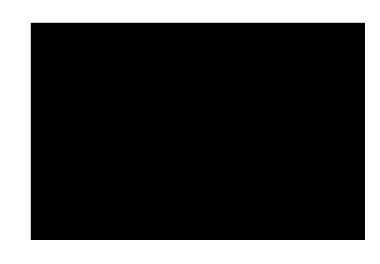

In [47]:
plt.title(cluster+' '+str(len(cluster_cells)))
plt.show()

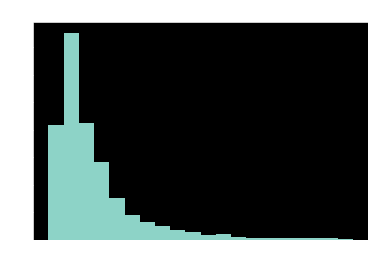

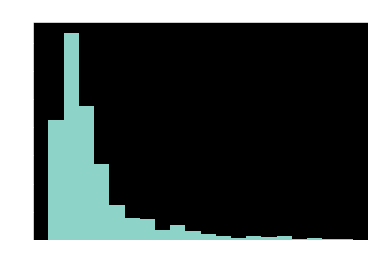

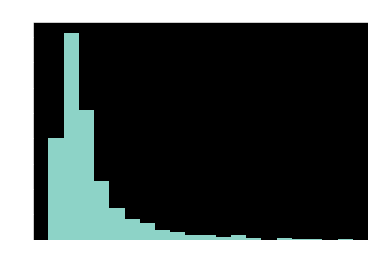

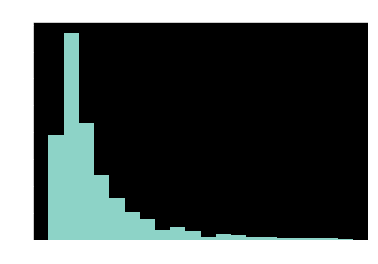

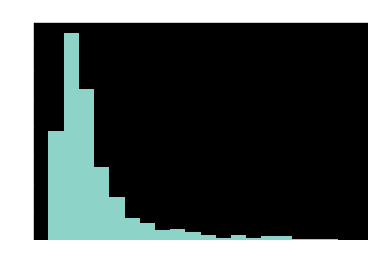

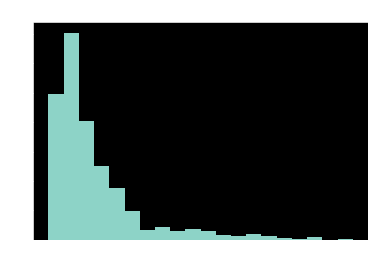

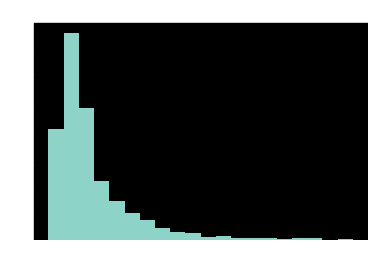

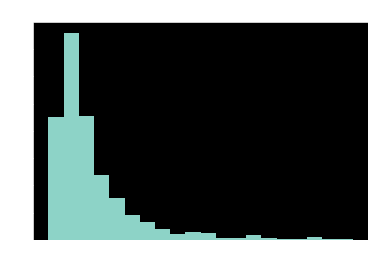

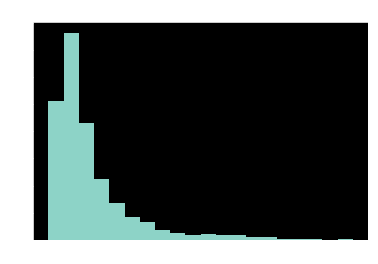

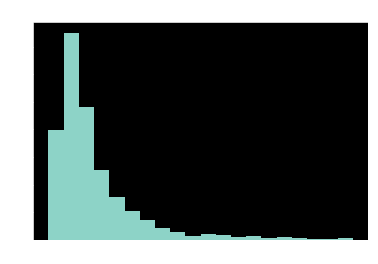

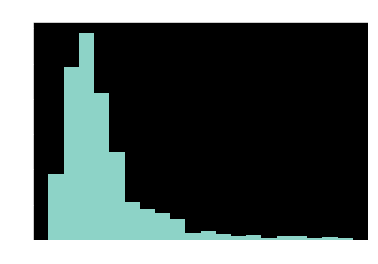

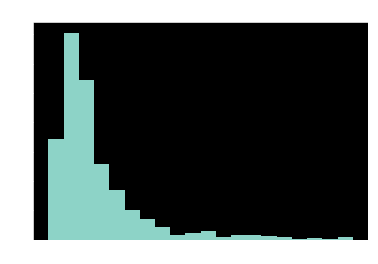

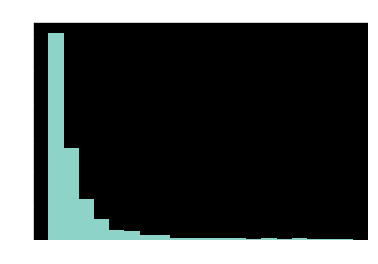

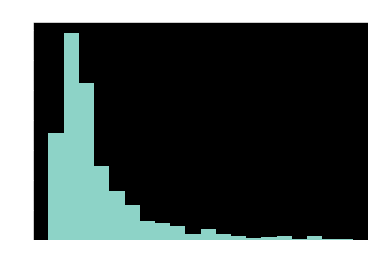

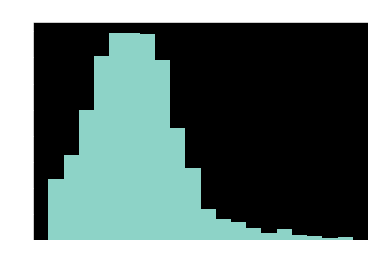

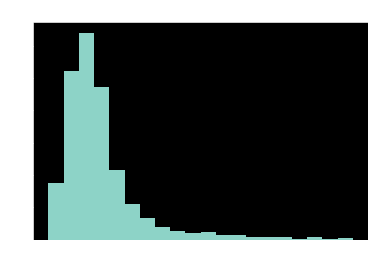

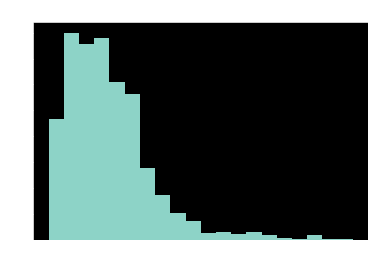

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


ValueError: supplied range of [nan, nan] is not finite

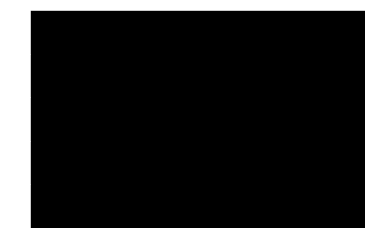

In [55]:
t = 1
for cluster in good_types:
    cluster_cells = list(metadata[metadata['cell_type_alias_label']==cluster].index)
    covariance_matrix = np.cov(filtered_counts[cluster_cells])
    diag = covariance_matrix[range(len(filtered_genes)),range(len(filtered_genes))].ravel()
    avg = cell_type_averages[cluster]
    norm_cov = diag/avg
    min_t = np.percentile(norm_cov.ravel(),t)
    max_t = np.percentile(norm_cov.ravel(),100-t)
    plt.hist(norm_cov,range=(min_t,max_t),bins=20)
    plt.title(cluster+' '+str(len(cluster_cells)))
    plt.show()

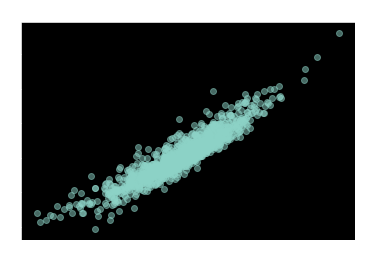

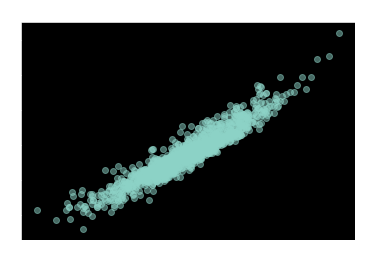

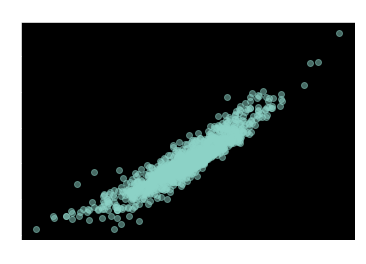

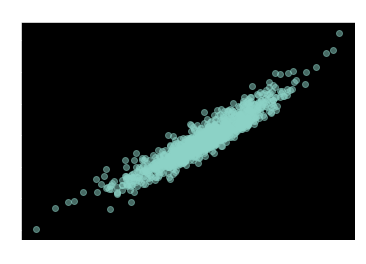

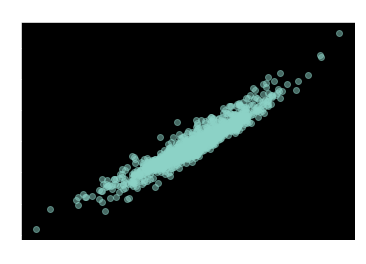

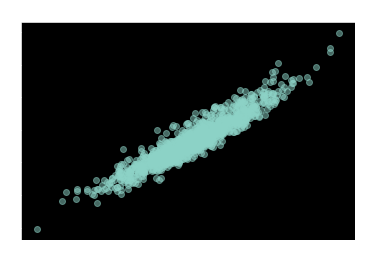

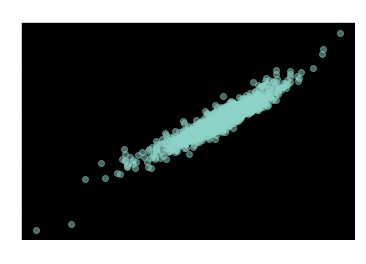

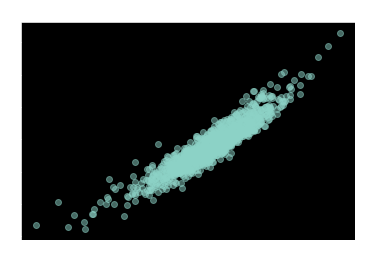

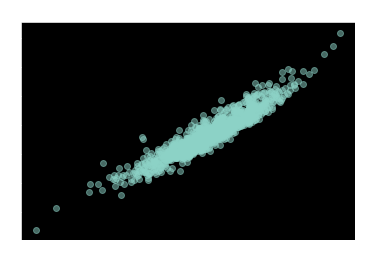

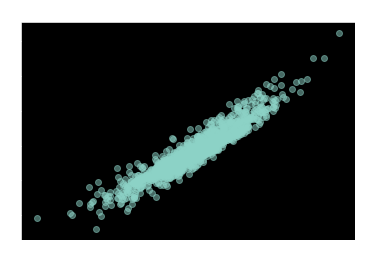

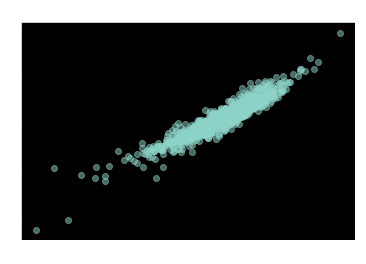

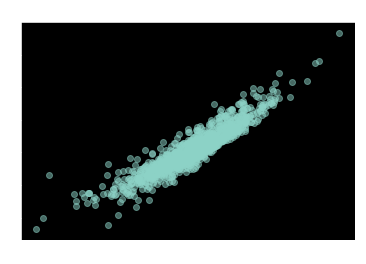

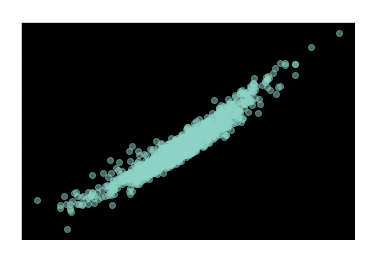

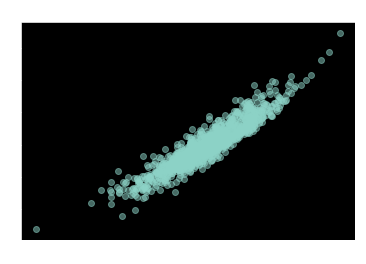

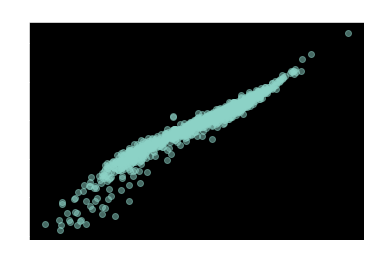

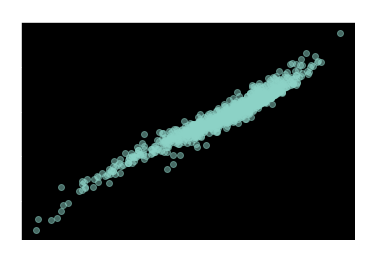

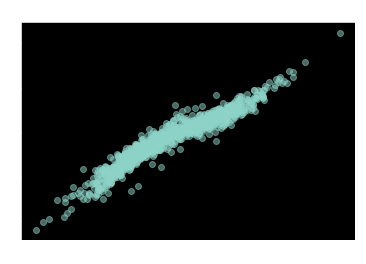

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


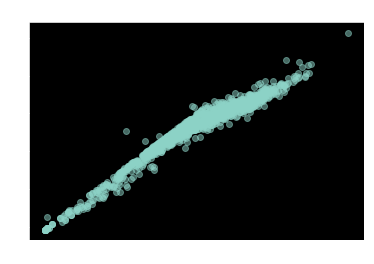

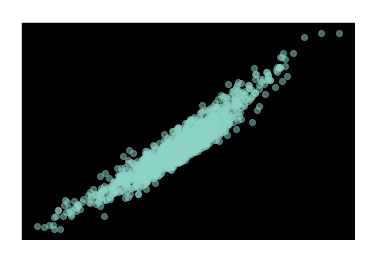

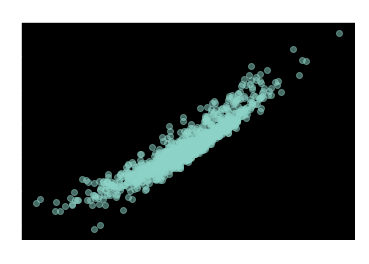

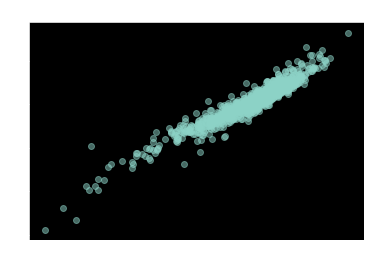

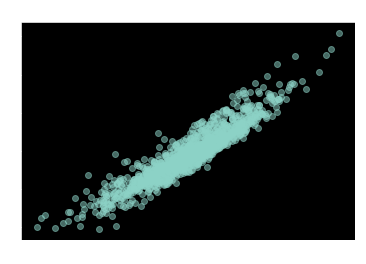

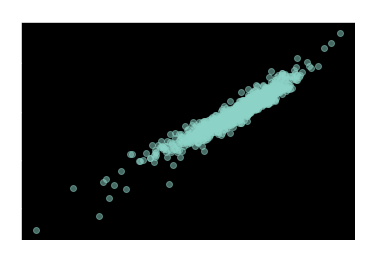

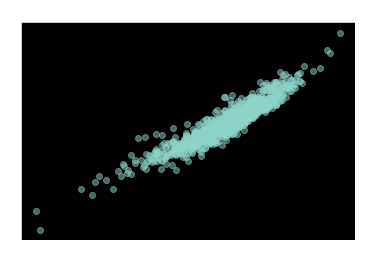

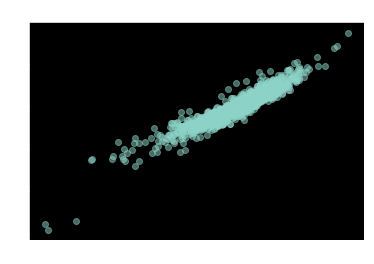

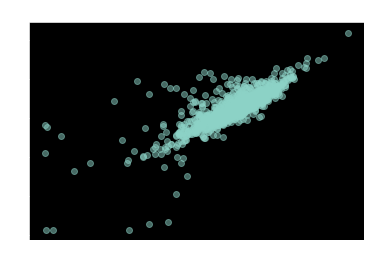

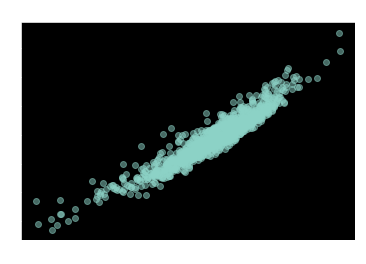

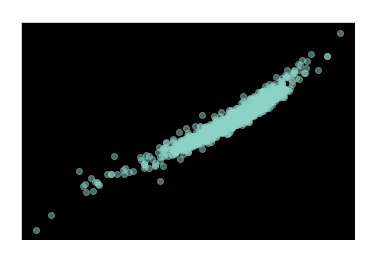

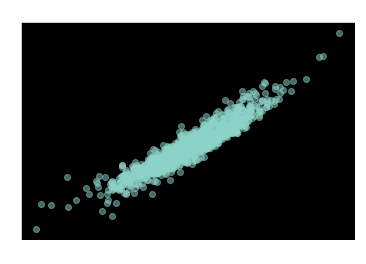

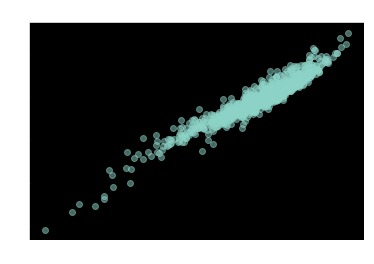

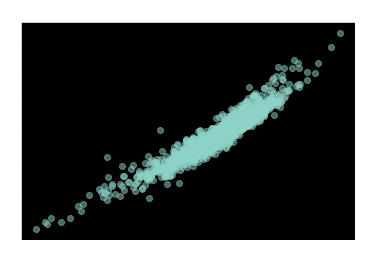

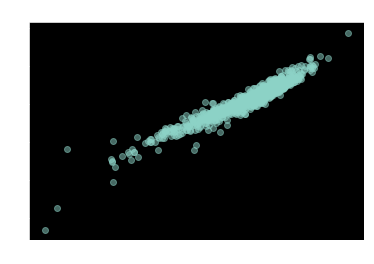

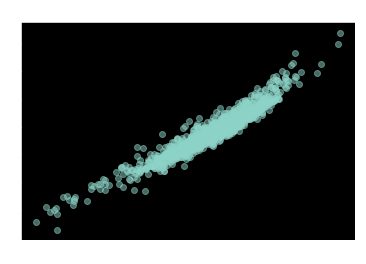

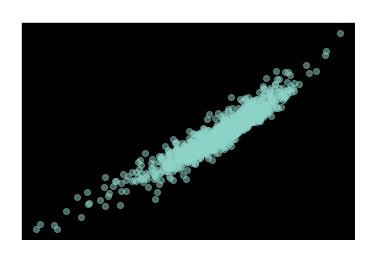

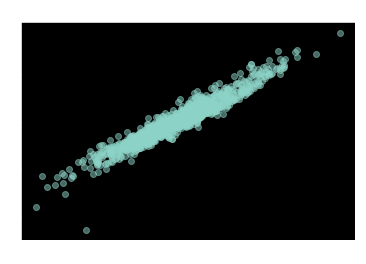

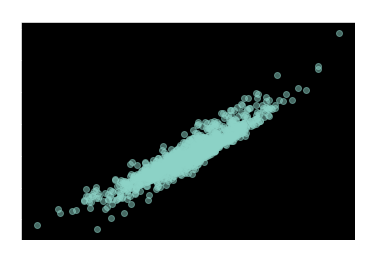

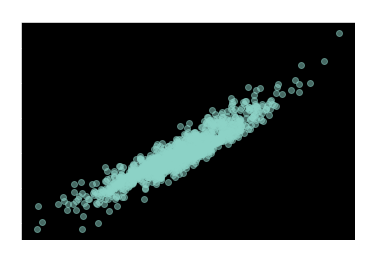

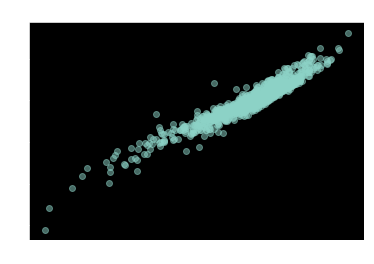

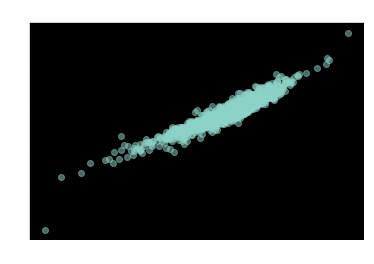

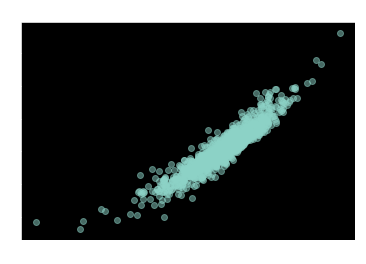

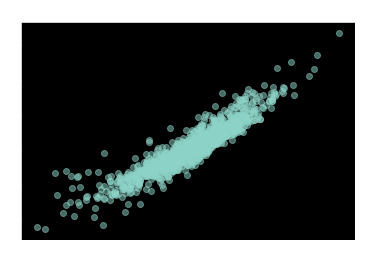

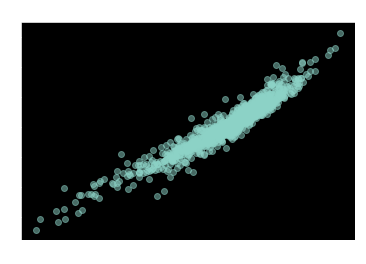

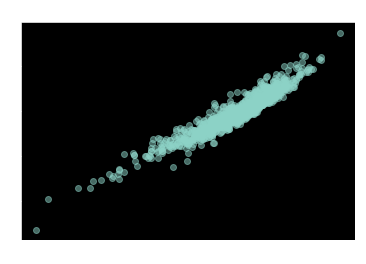

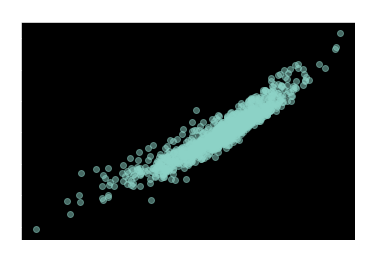

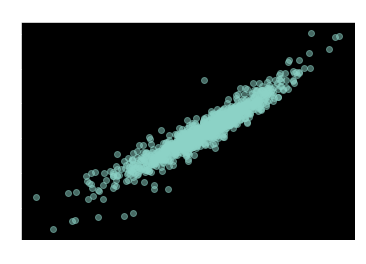

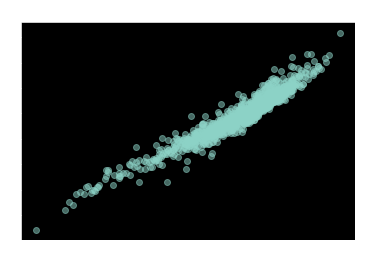

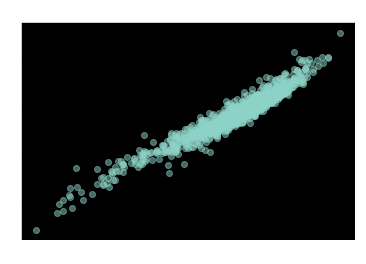

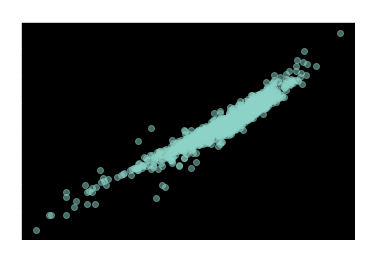

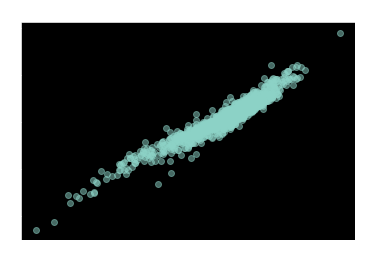

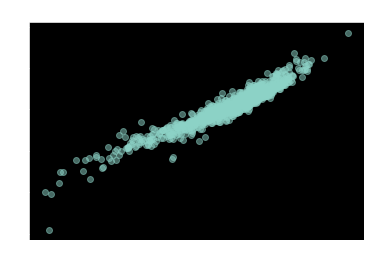

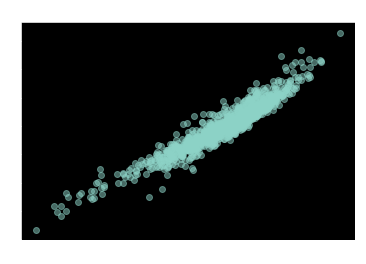

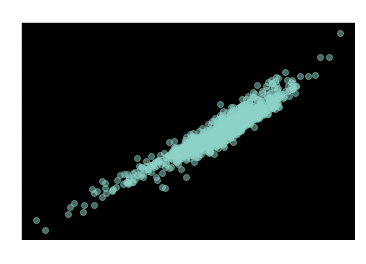

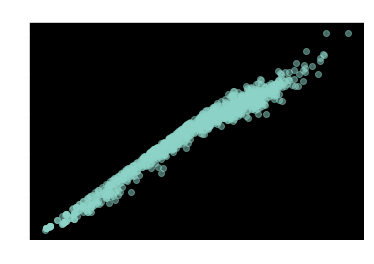

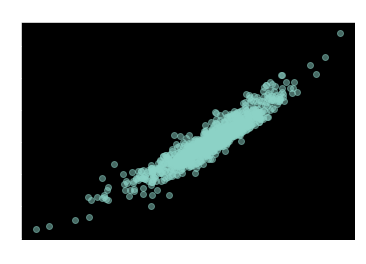

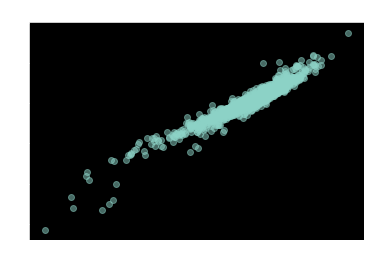

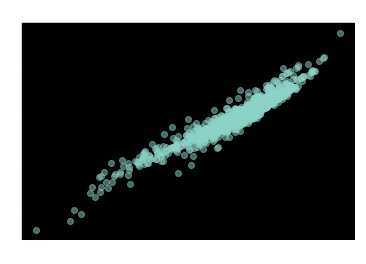

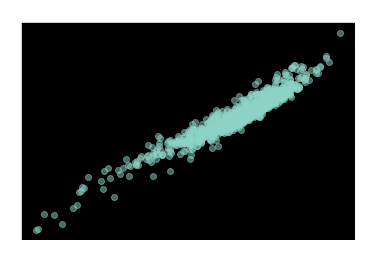

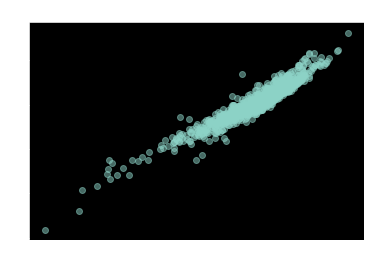

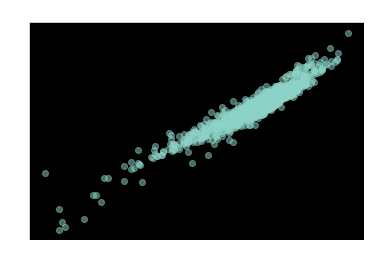

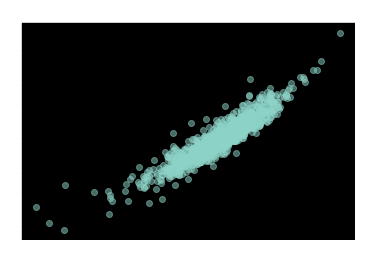

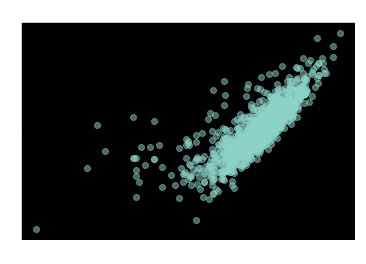

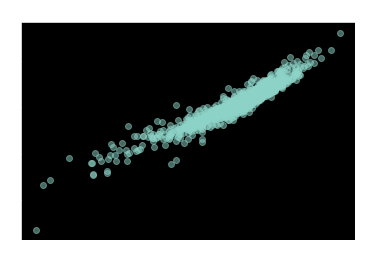

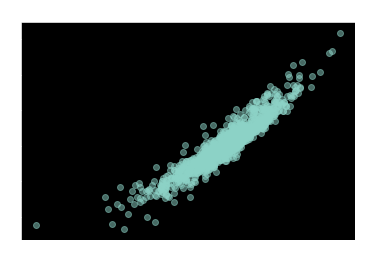

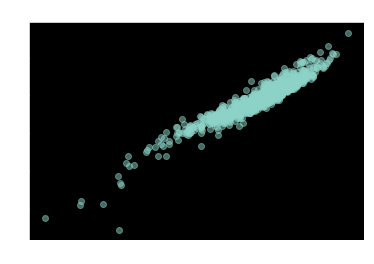

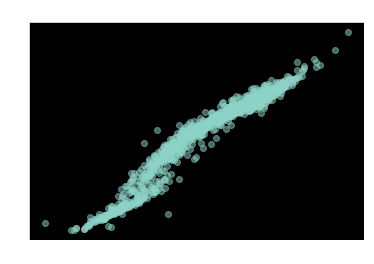

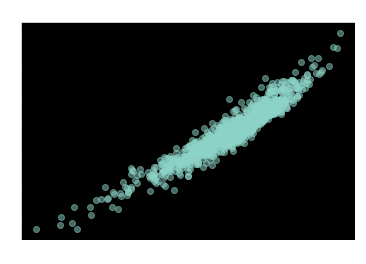

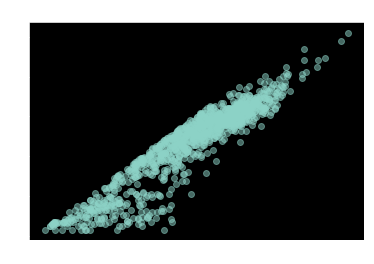

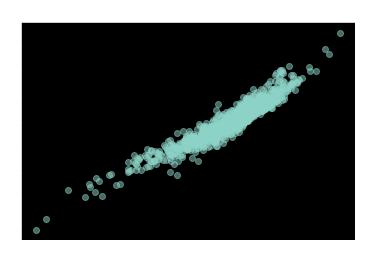

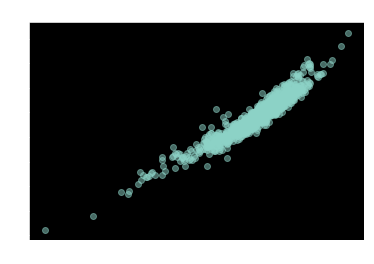

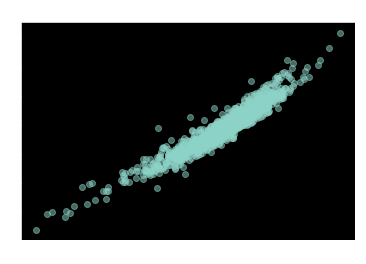

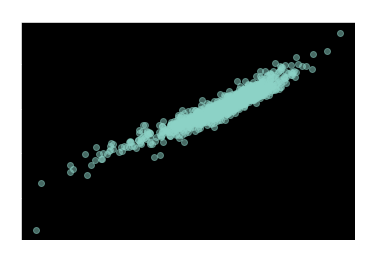

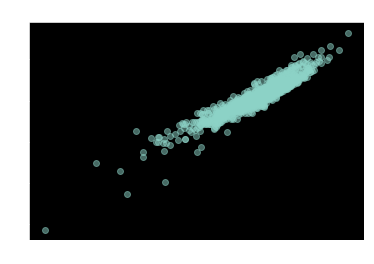

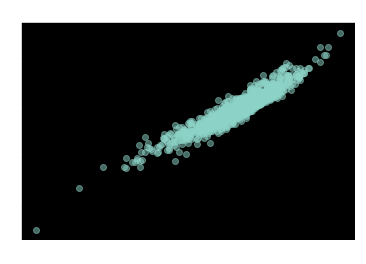

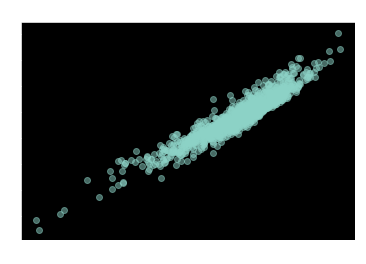

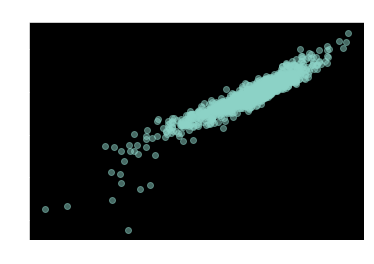

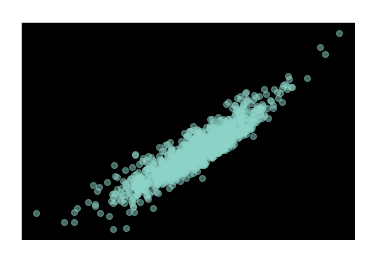

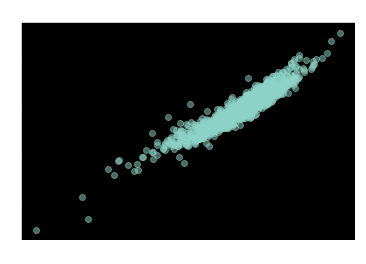

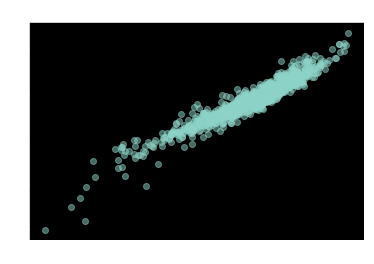

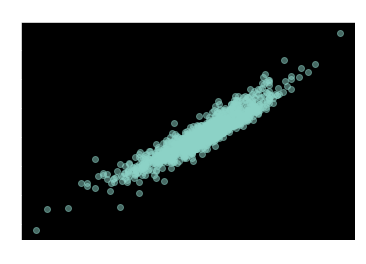

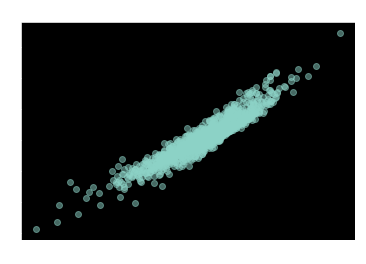

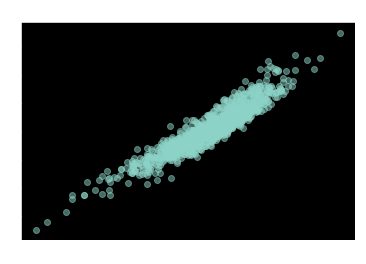

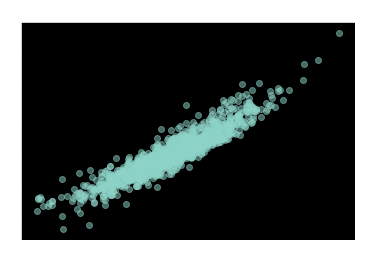

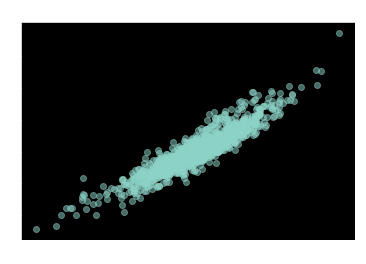

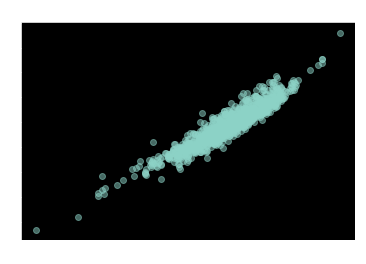

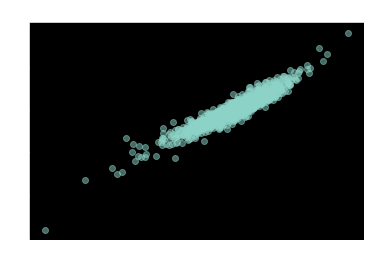

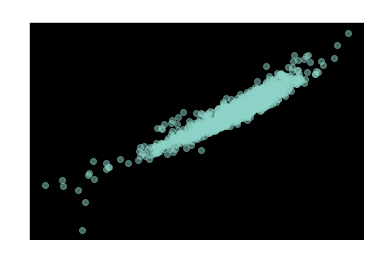

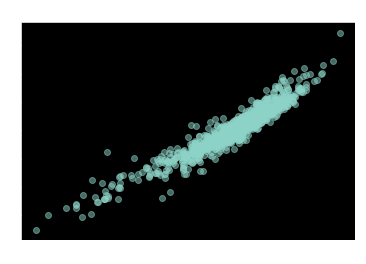

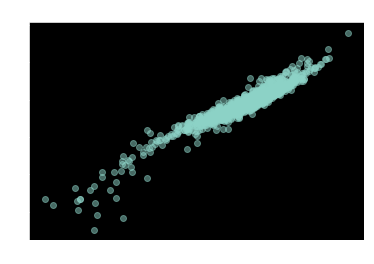

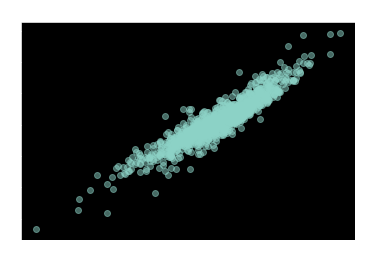

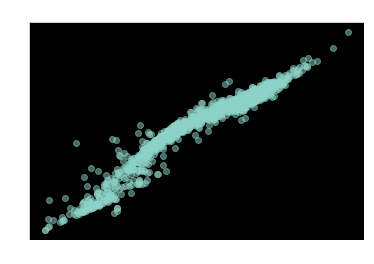

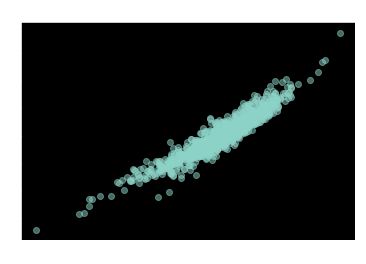

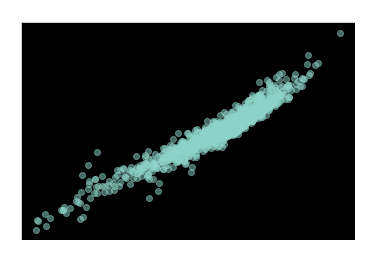

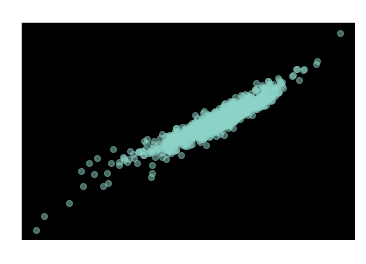

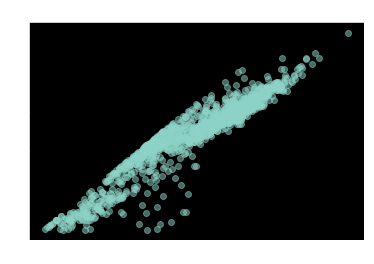

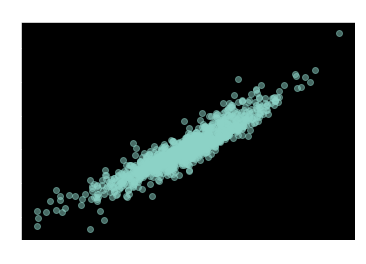

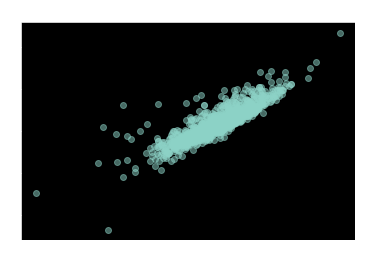

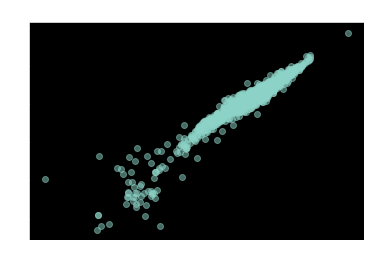

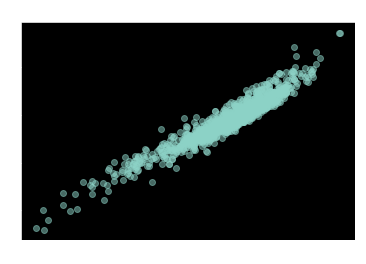

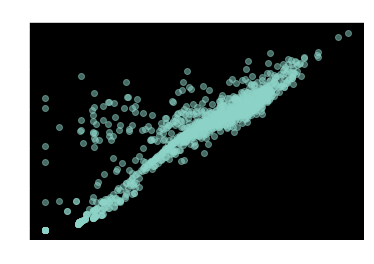

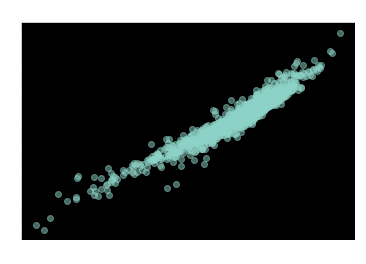

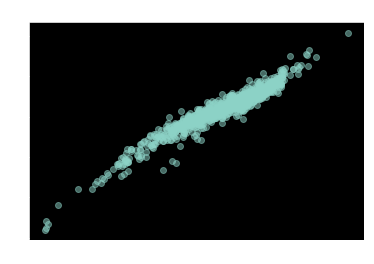

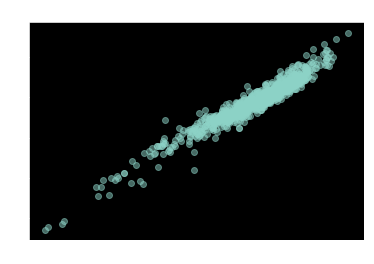

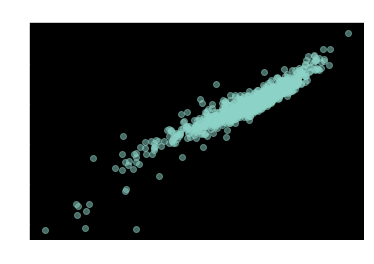

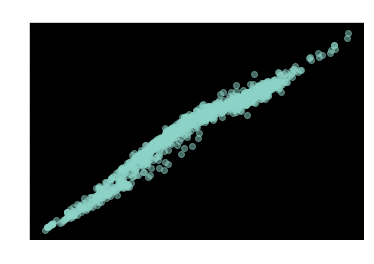

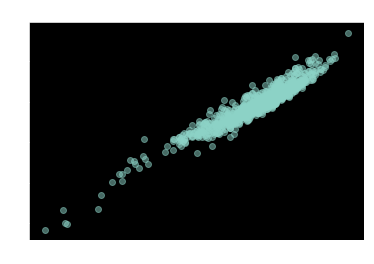

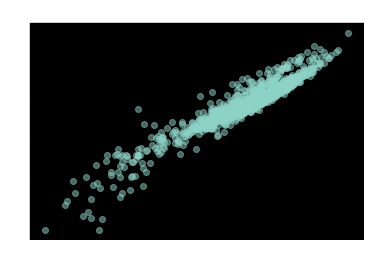

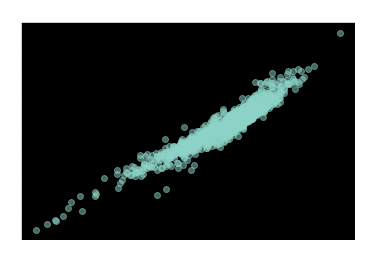

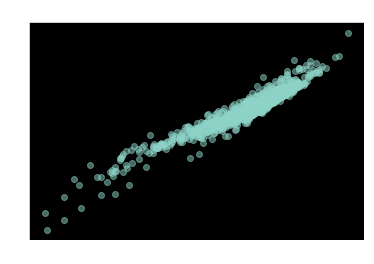

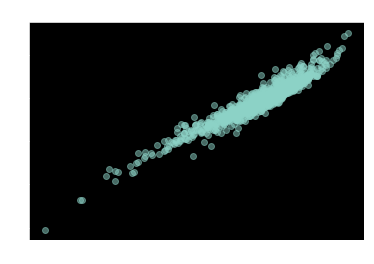

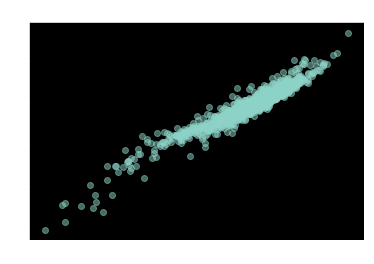

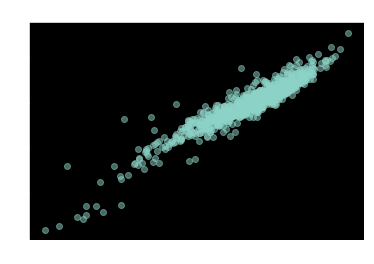

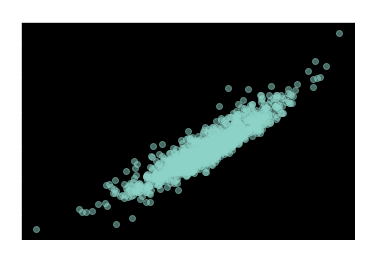

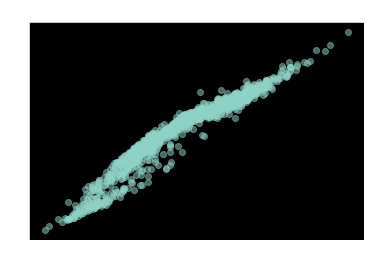

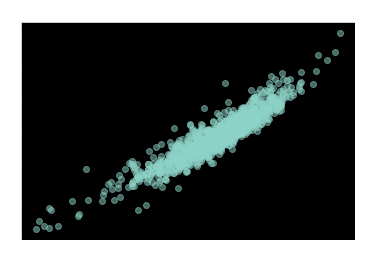

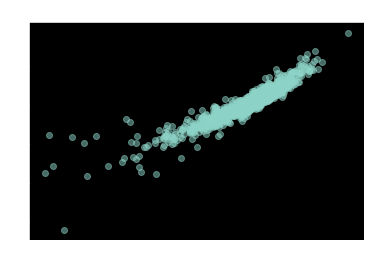

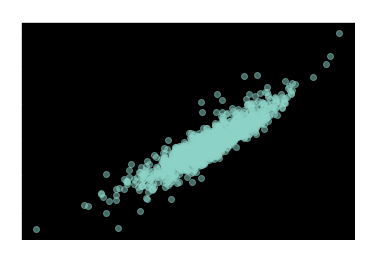

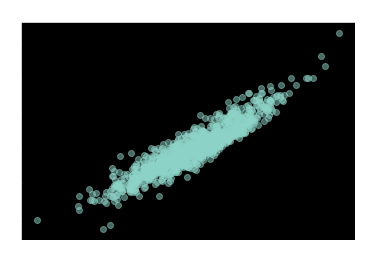

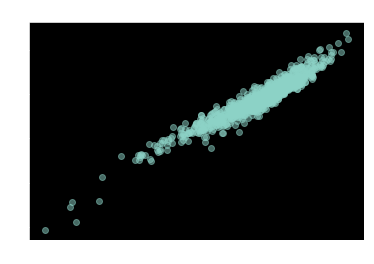

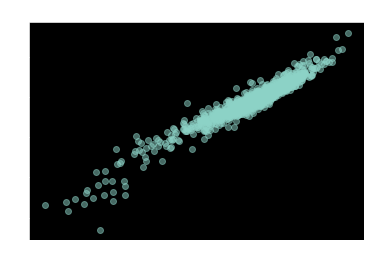

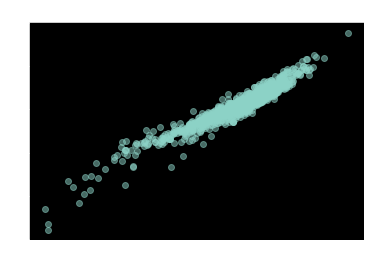

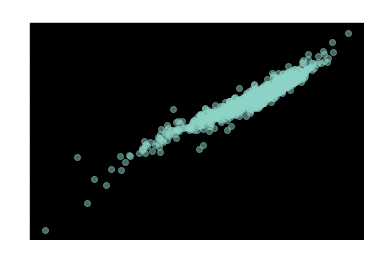

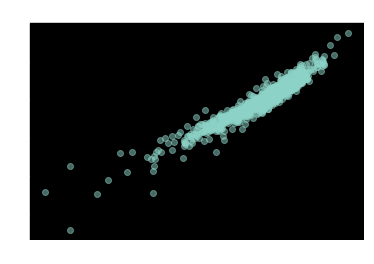

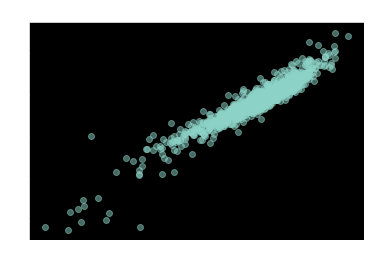

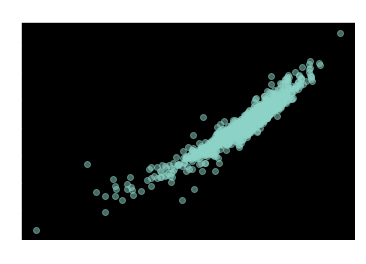

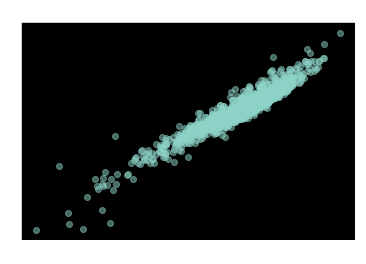

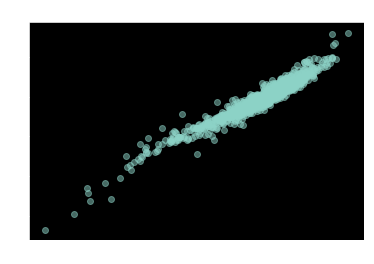

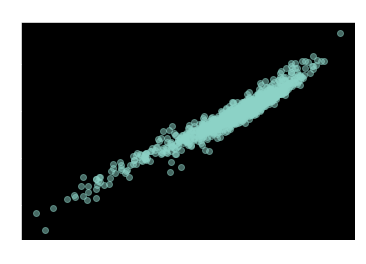

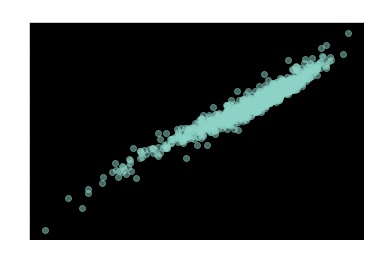

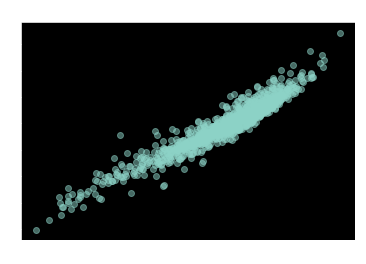

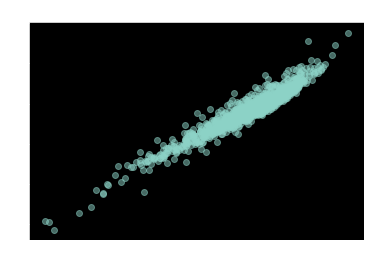

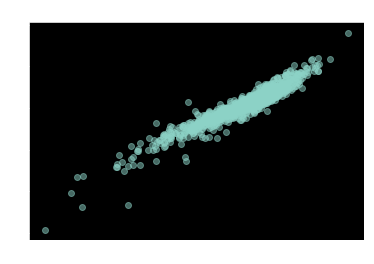

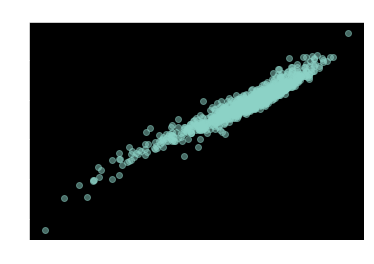

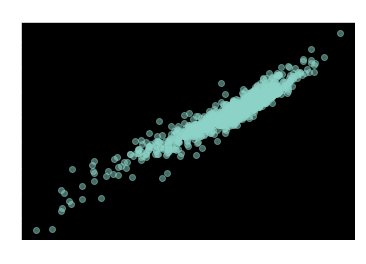

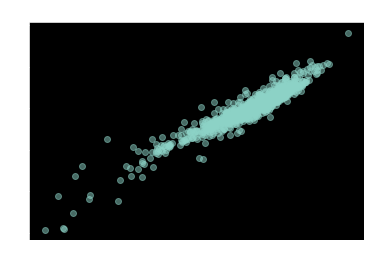

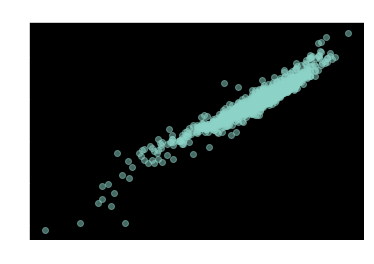

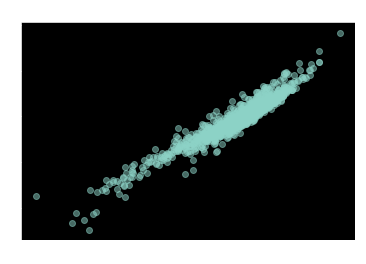

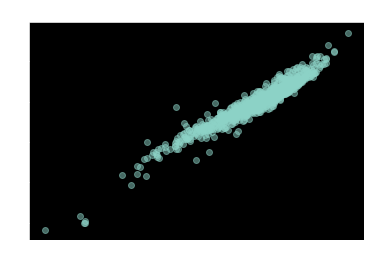

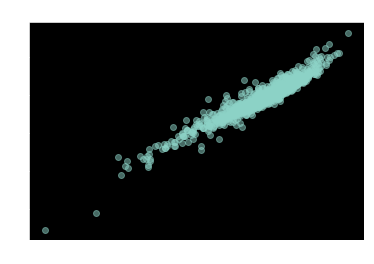

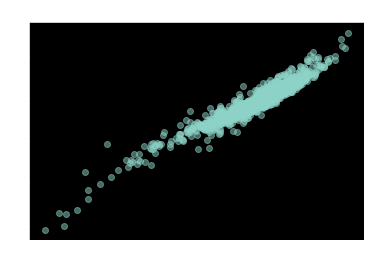

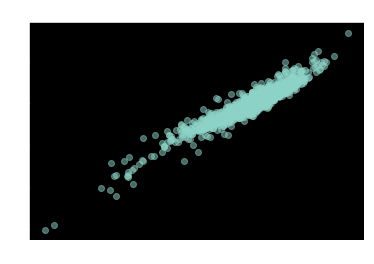

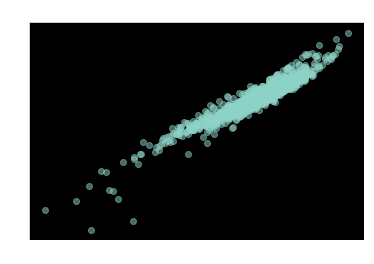

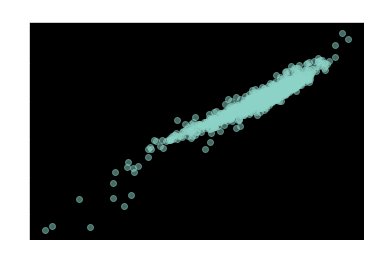

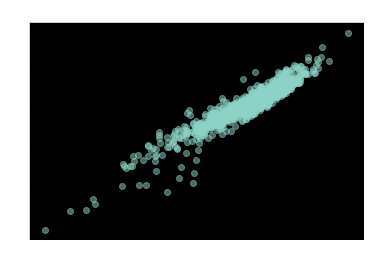

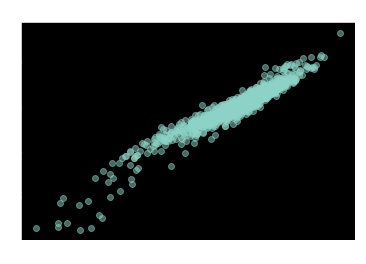

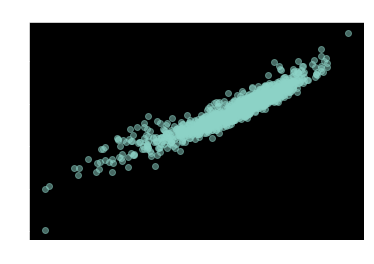

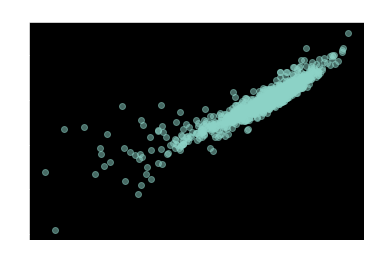

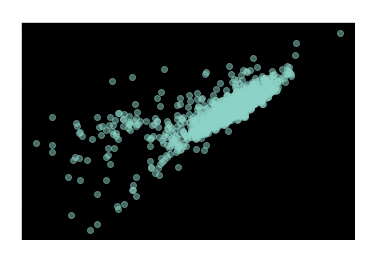

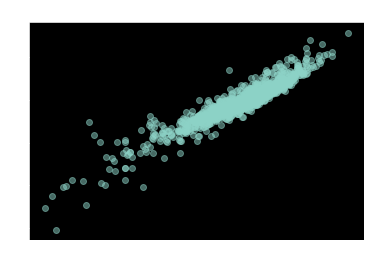

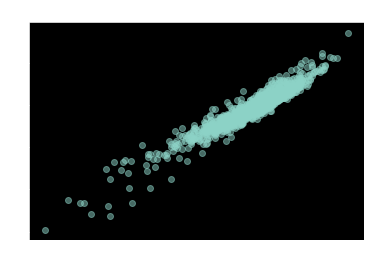

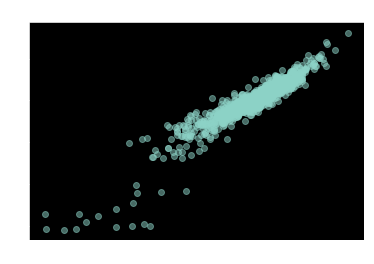

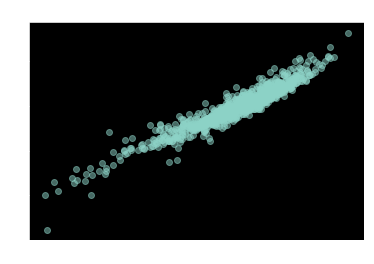

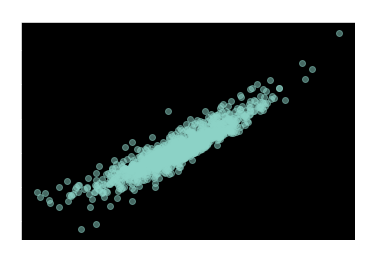

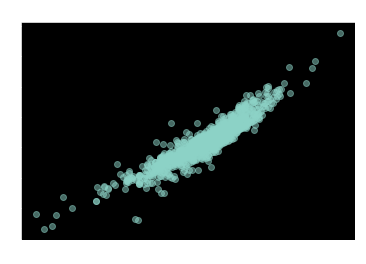

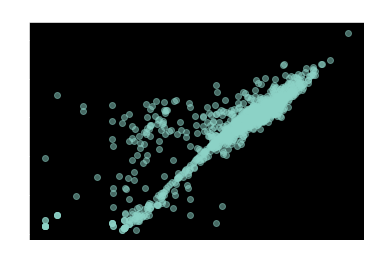

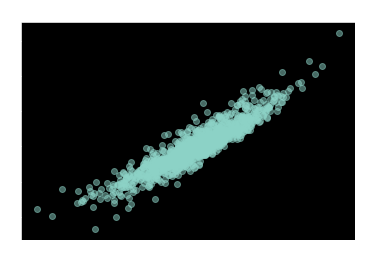

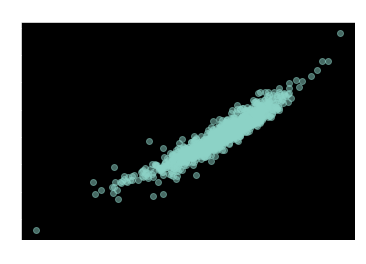

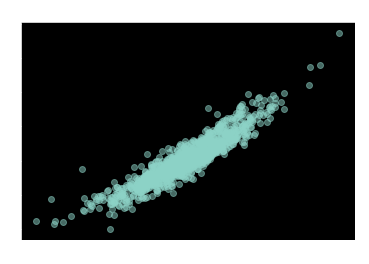

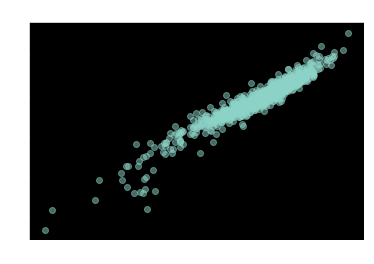

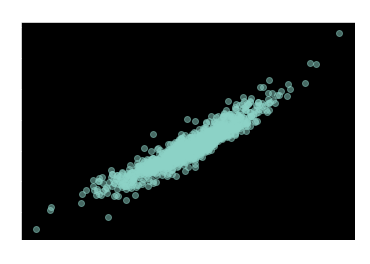

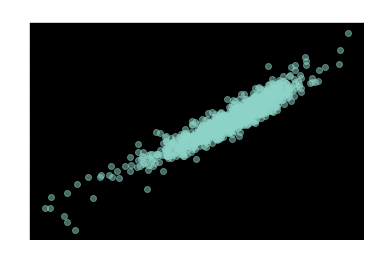

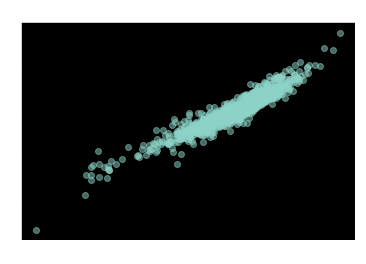

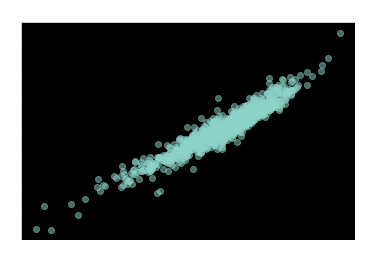

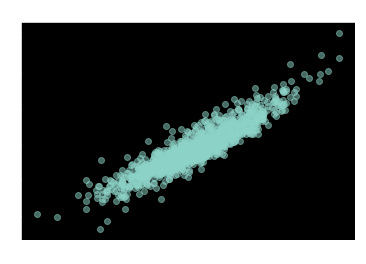

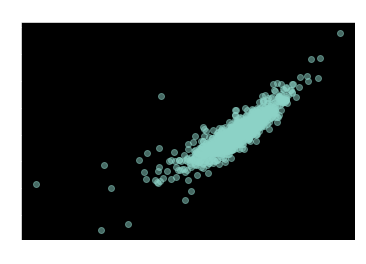

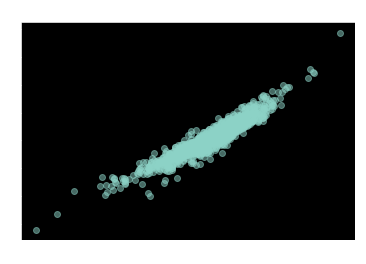

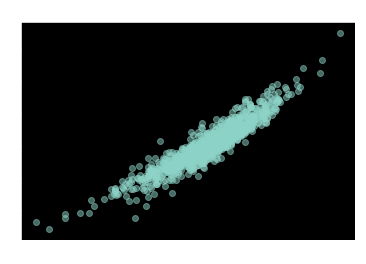

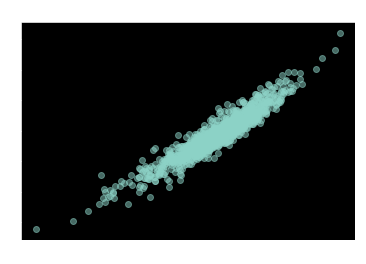

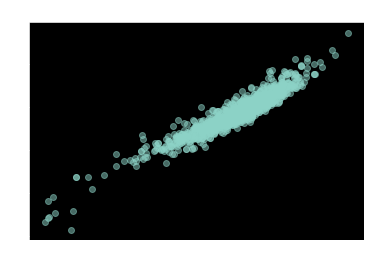

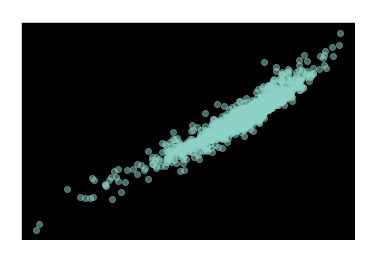

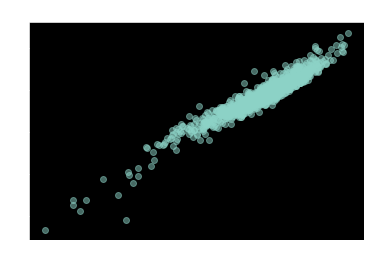

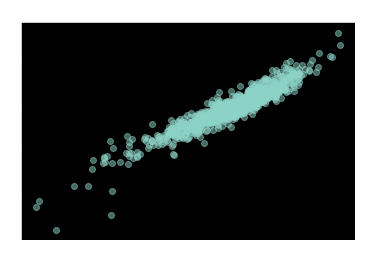

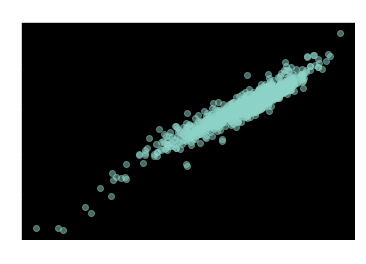

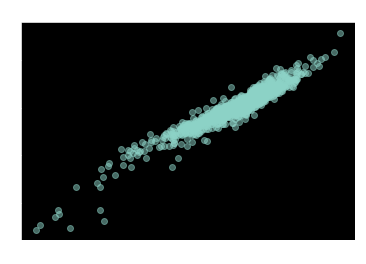

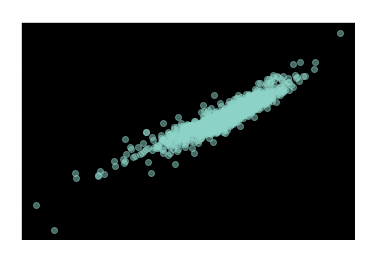

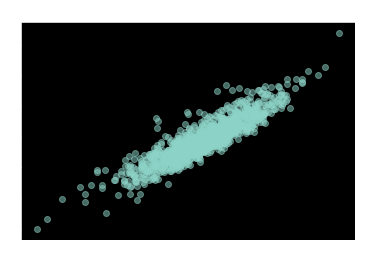

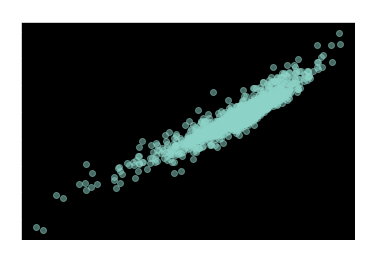

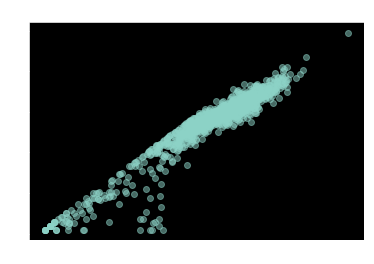

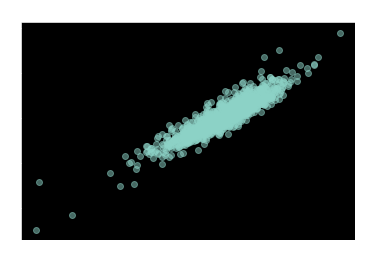

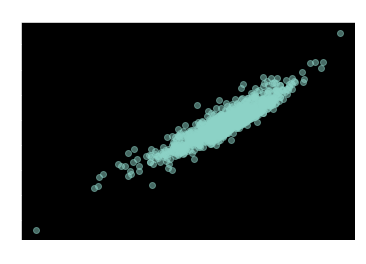

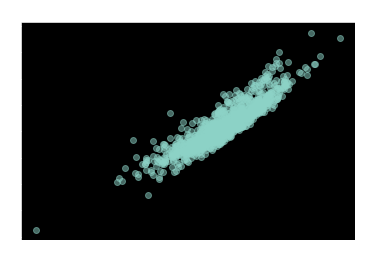

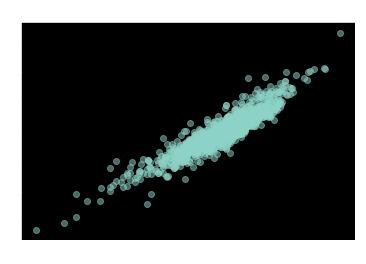

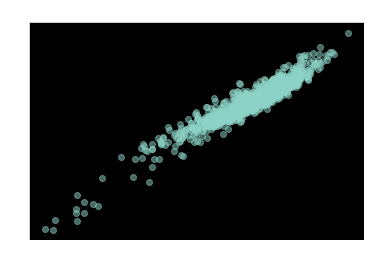

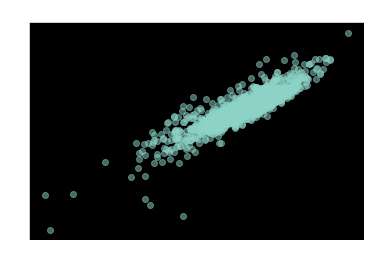

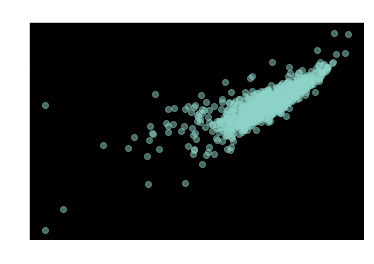

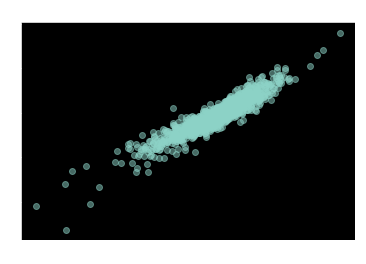

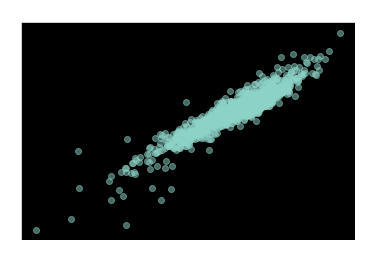

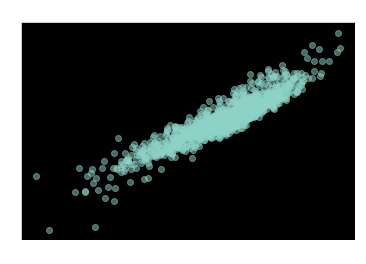

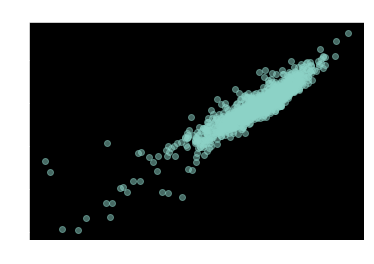

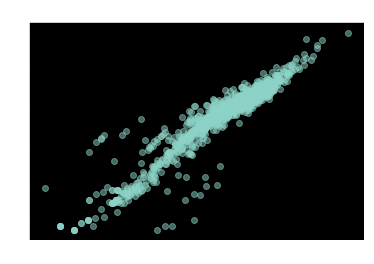

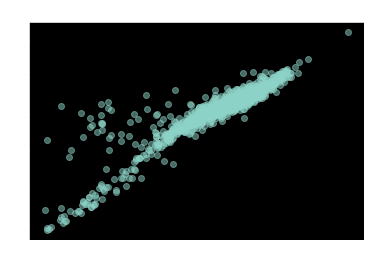

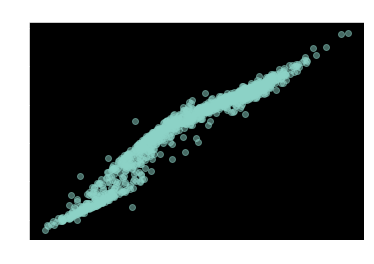

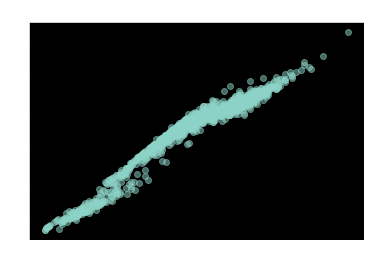

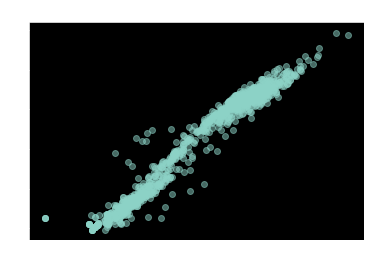

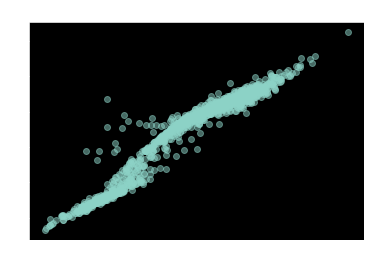

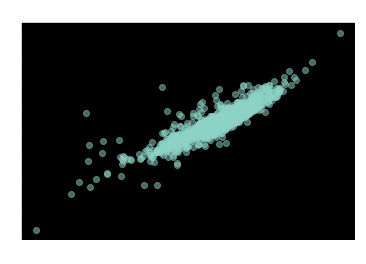

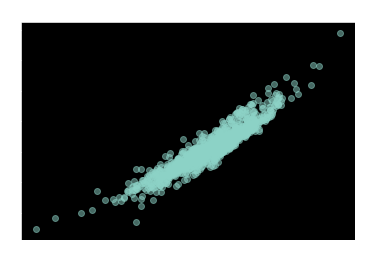

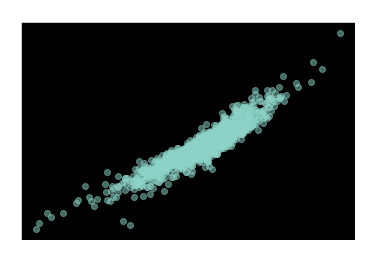

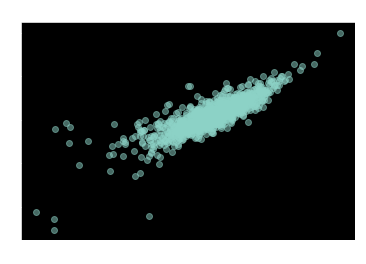

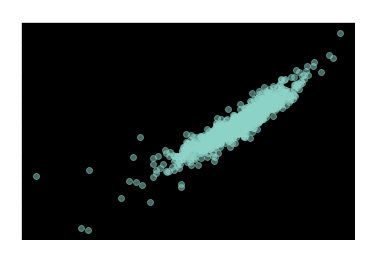

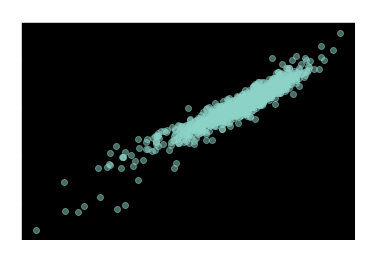

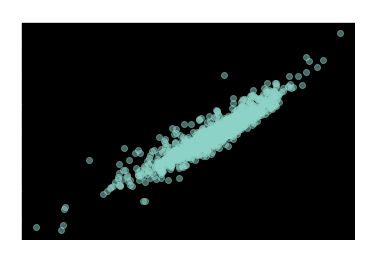

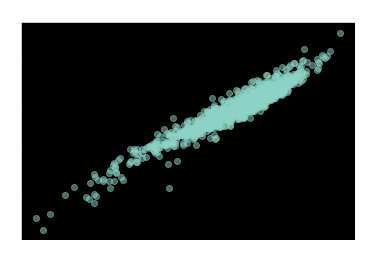

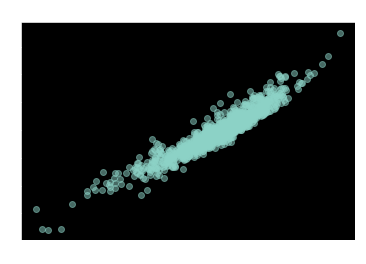

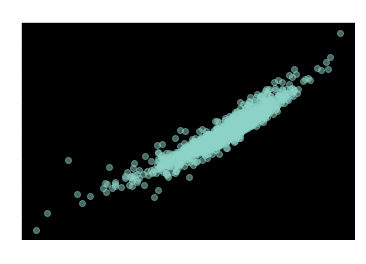

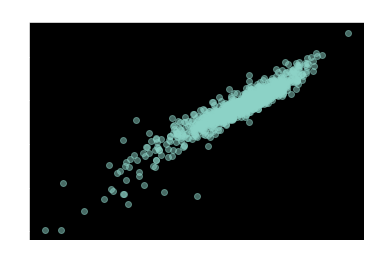

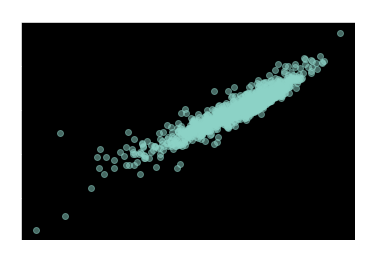

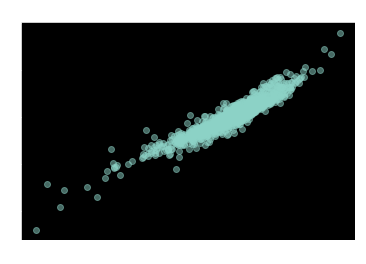

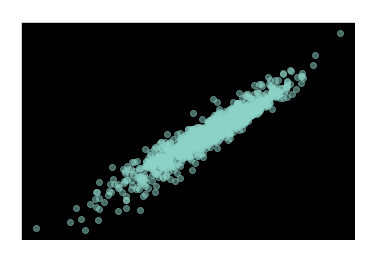

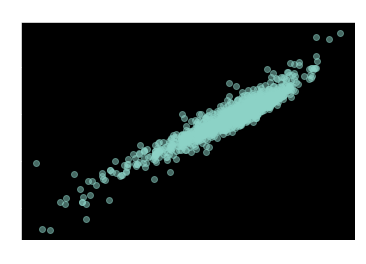

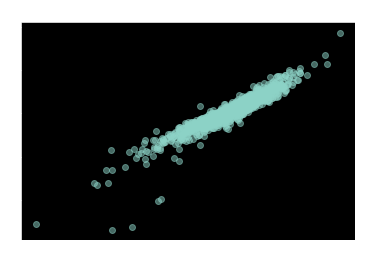

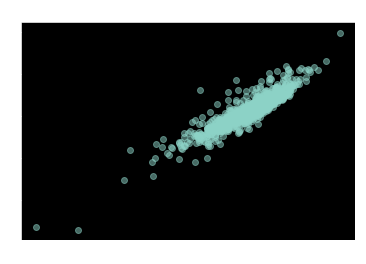

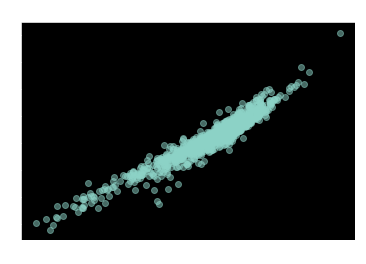

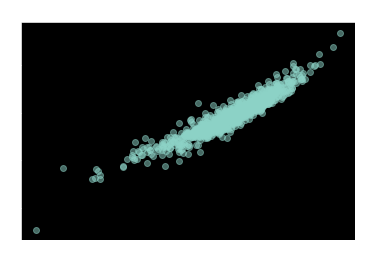

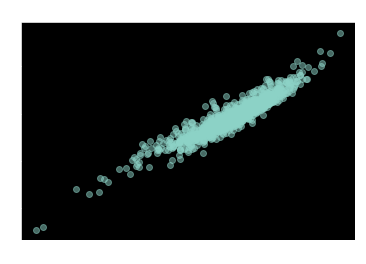

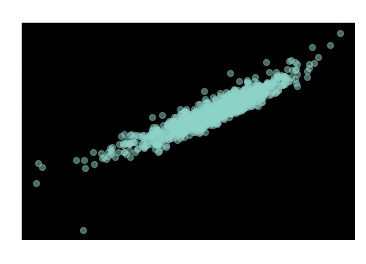

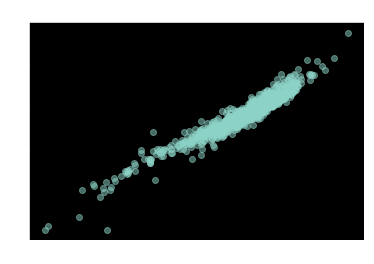

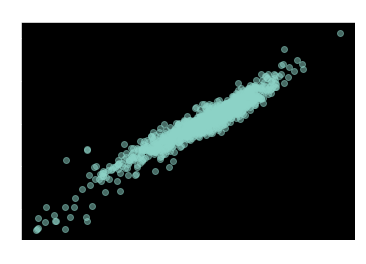

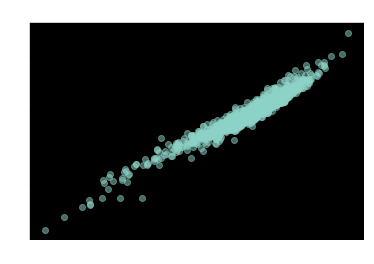

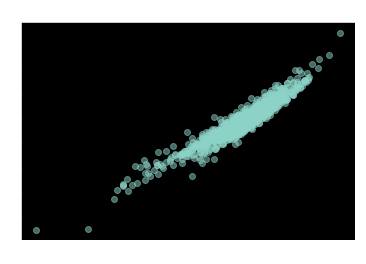

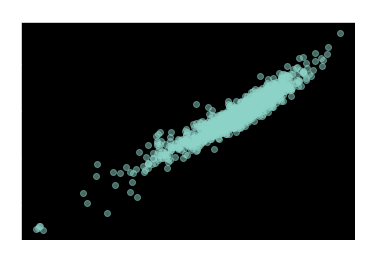

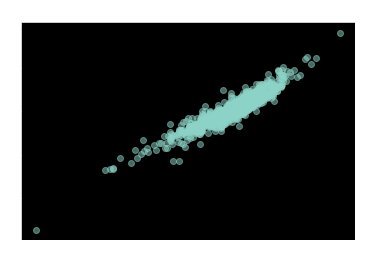

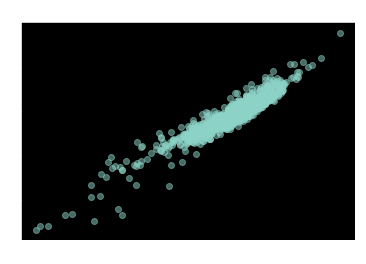

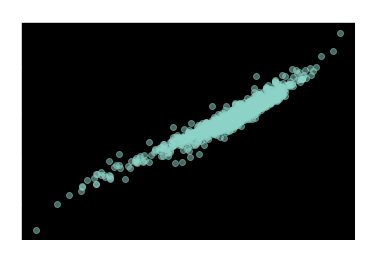

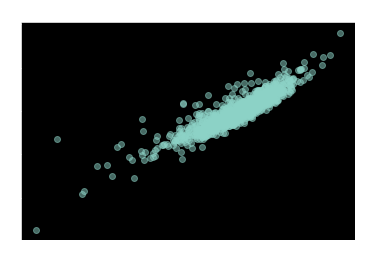

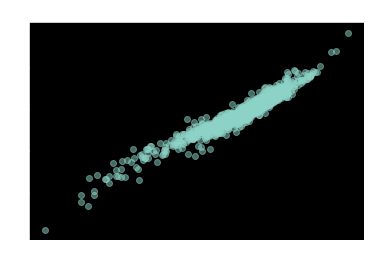

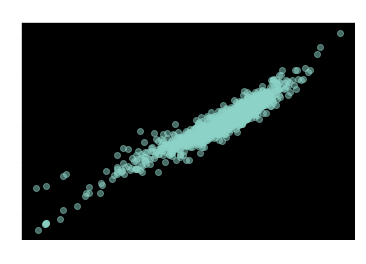

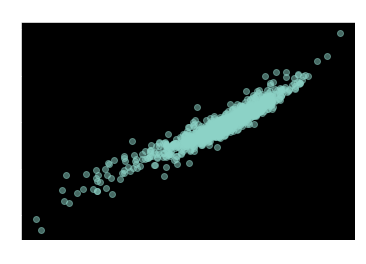

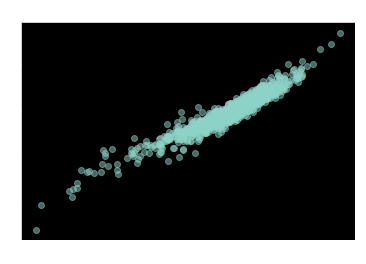

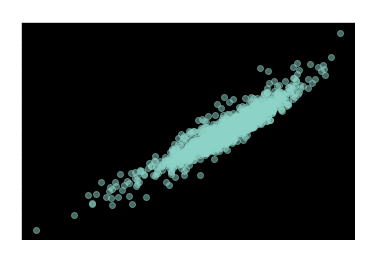

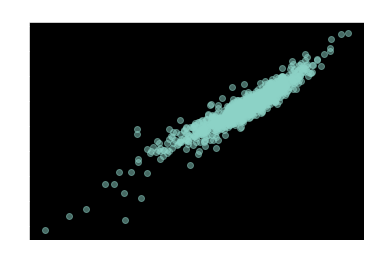

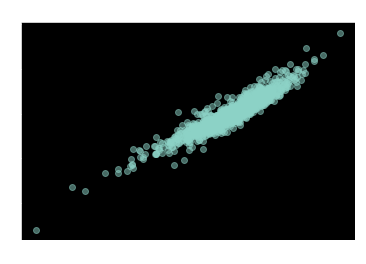

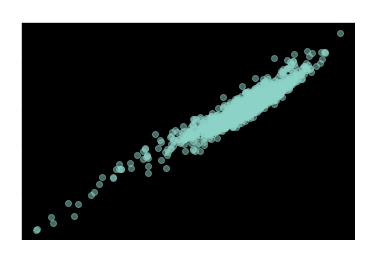

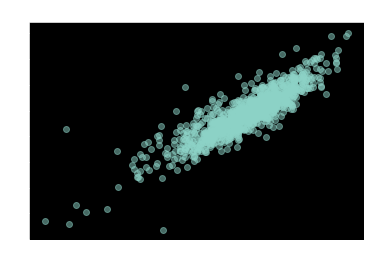

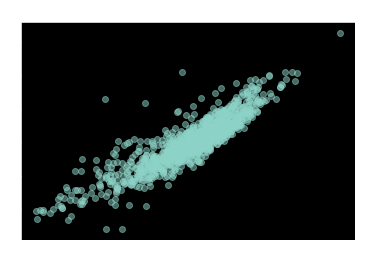

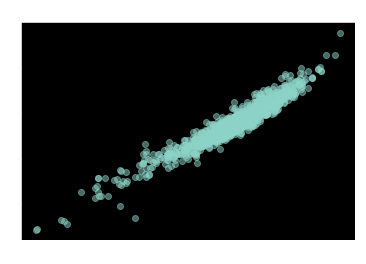

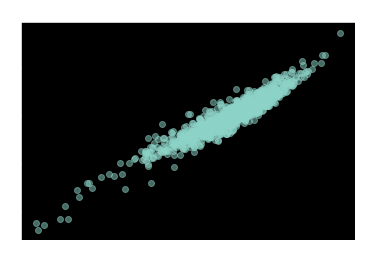

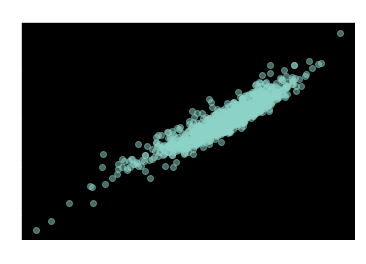

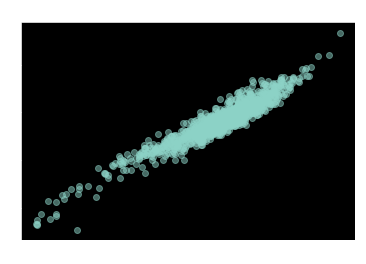

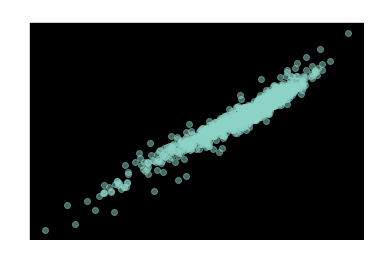

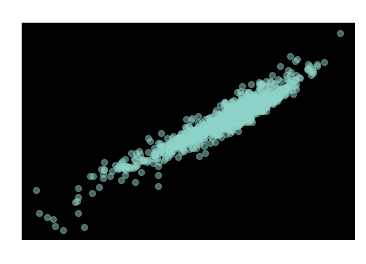

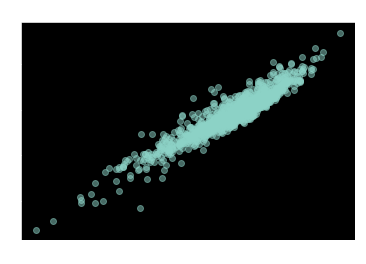

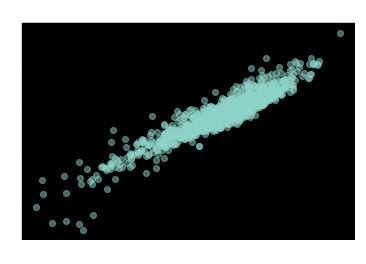

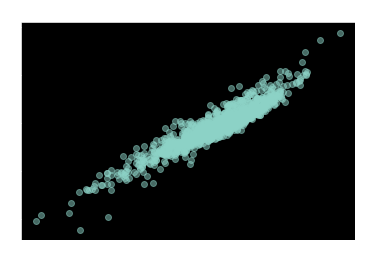

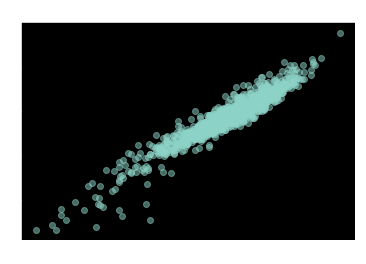

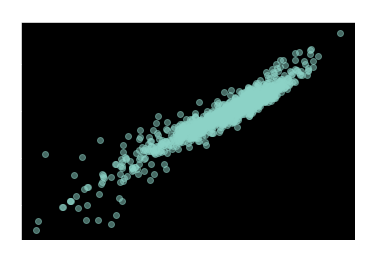

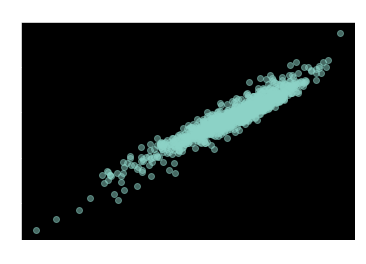

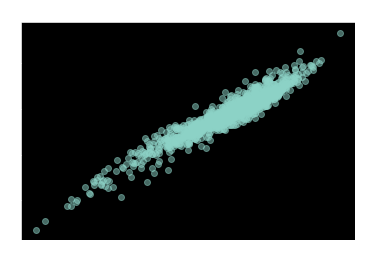

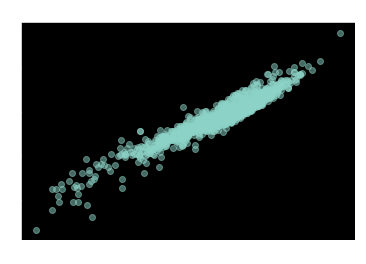

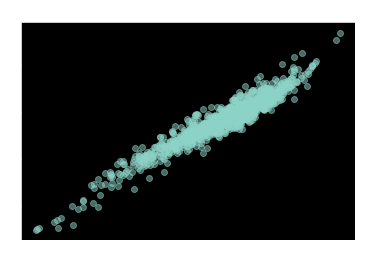

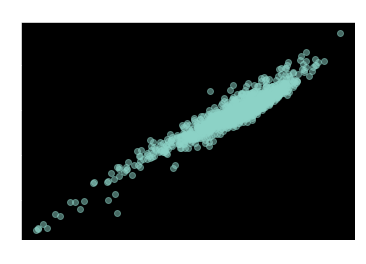

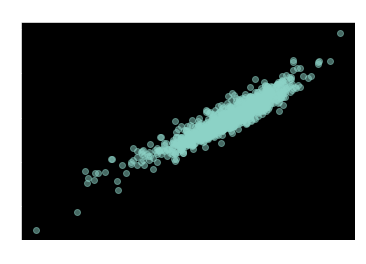

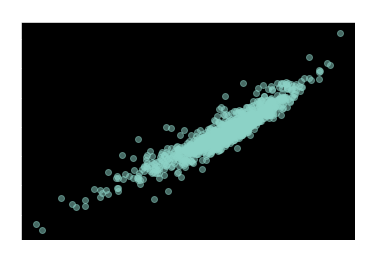

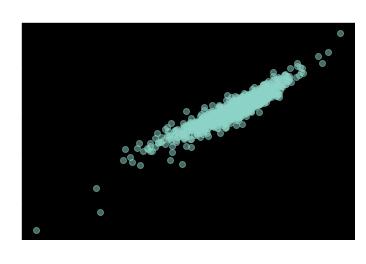

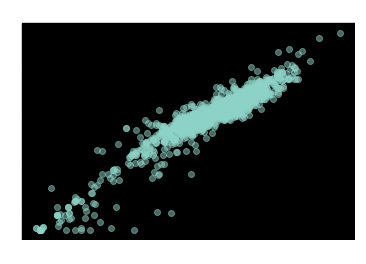

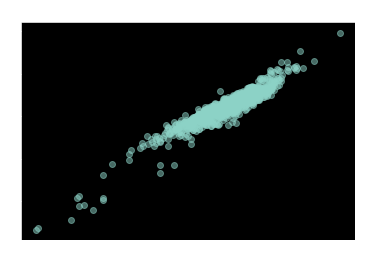

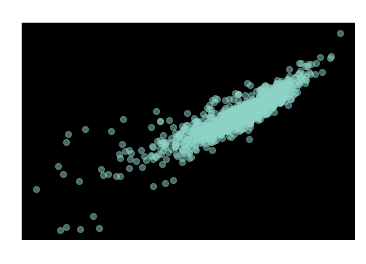

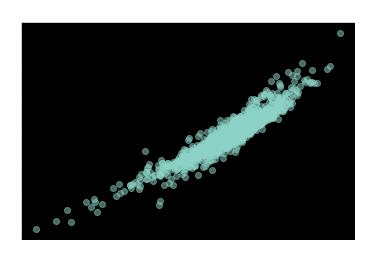

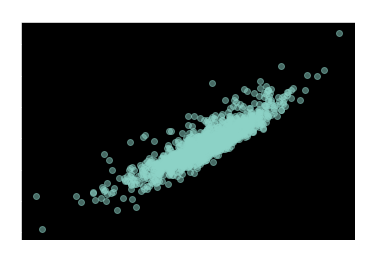

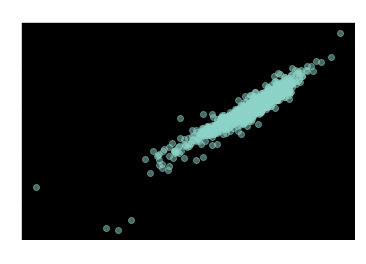

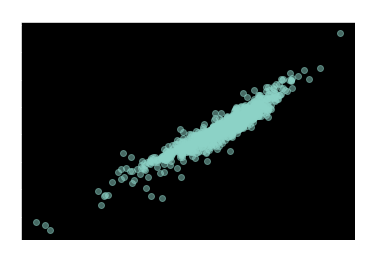

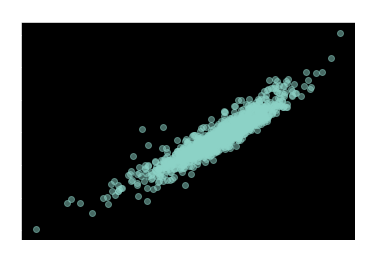

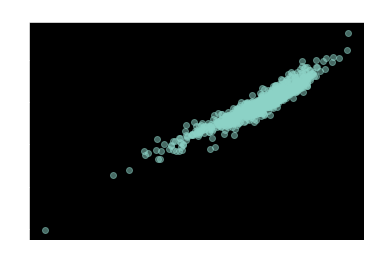

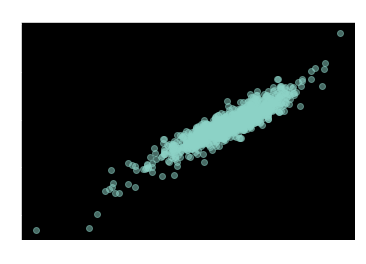

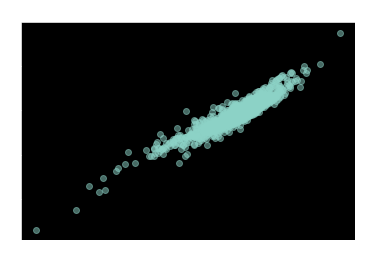

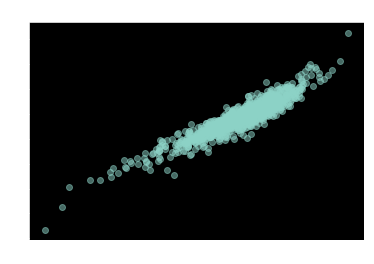

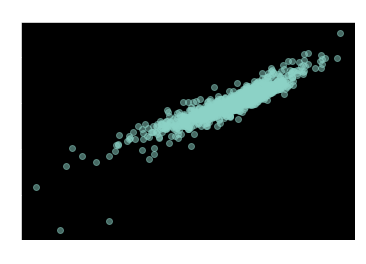

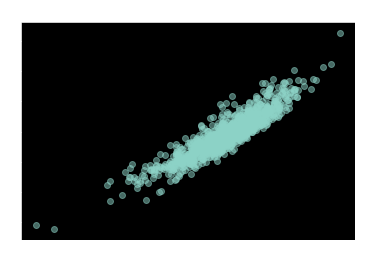

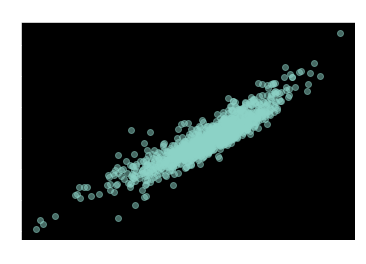

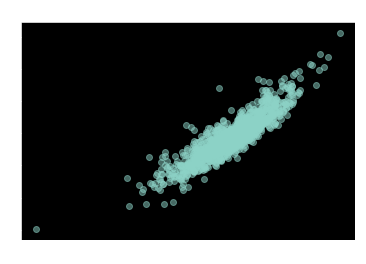

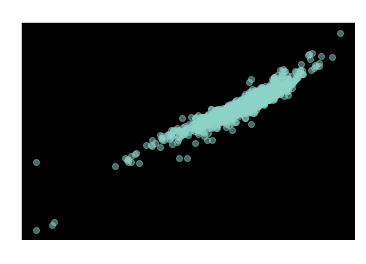

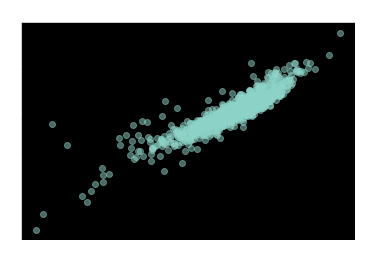

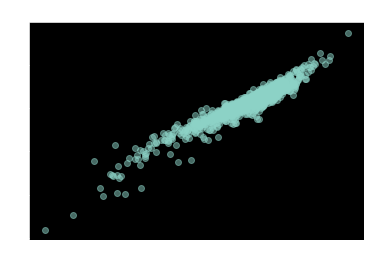

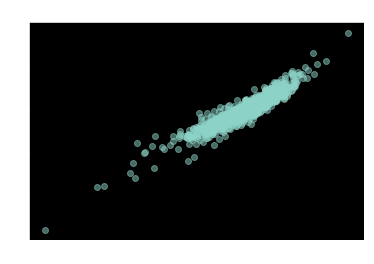

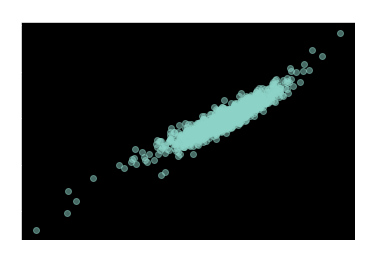

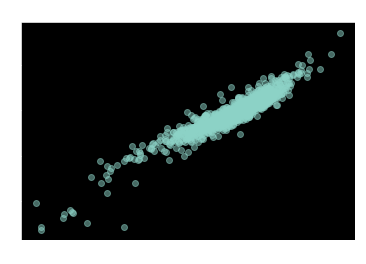

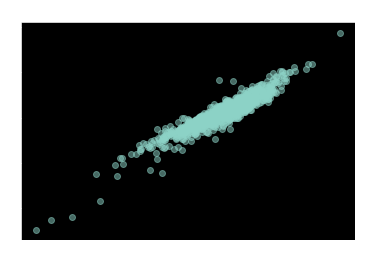

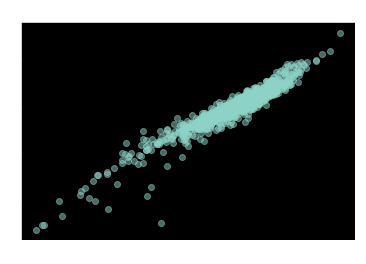

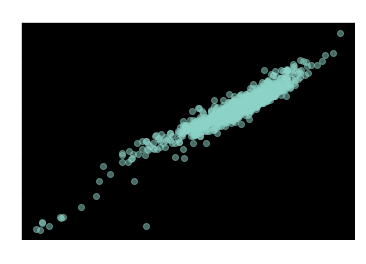

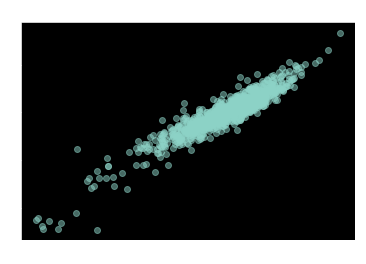

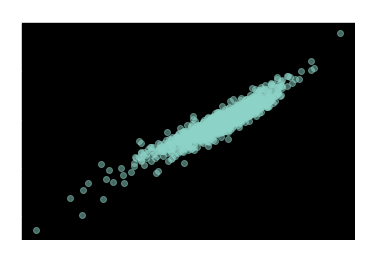

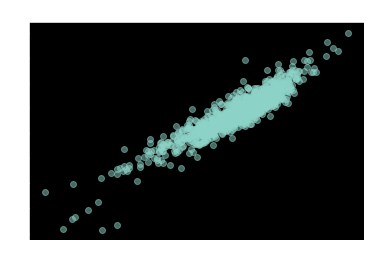

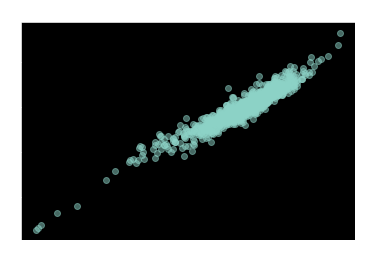

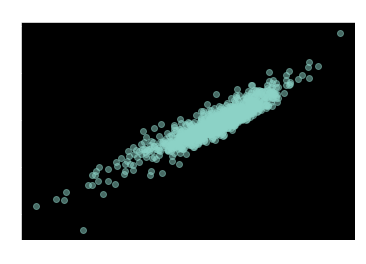

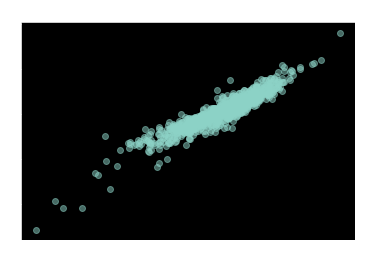

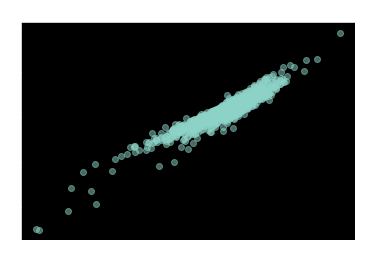

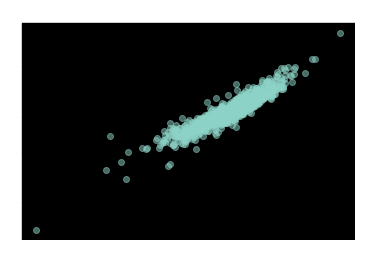

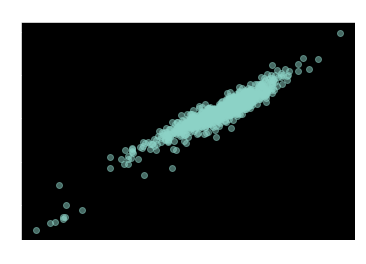

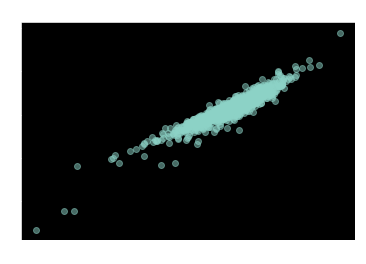

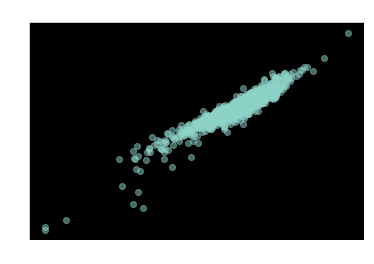

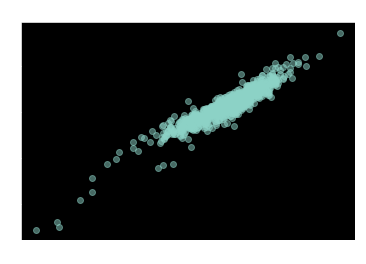

In [57]:
t = 1
for cluster in good_types:
    cluster_cells = list(metadata[metadata['cell_type_alias_label']==cluster].index)
    covariance_matrix = np.cov(filtered_counts[cluster_cells])
    diag = covariance_matrix[range(len(filtered_genes)),range(len(filtered_genes))].ravel()
    avg = cell_type_averages[cluster]
    plt.scatter(np.log10(avg),np.log10(diag),alpha=0.5)
    plt.title(cluster)
    plt.show()

In [52]:
covariance_matrix = np.cov(filtered_counts[cluster_cells])

In [ ]:
covariance_matrix = np.cov(filtered_counts,bias=True)
plt.hist(covariance_matrix[range(len(filtered_genes)),range(len(filtered_genes))])

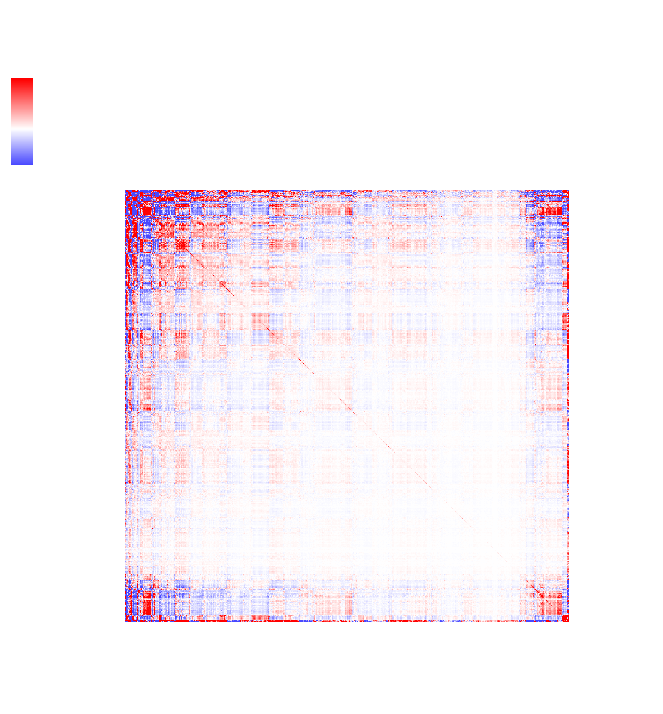

In [29]:
thresh = 1
covariance_matrix = np.cov(filtered_counts,bias=True)
vmin = np.percentile(covariance_matrix.ravel(),thresh)
vmax = np.percentile(covariance_matrix.ravel(),100-thresh)
g = sns.clustermap(pd.DataFrame(covariance_matrix,index=filtered_genes,columns=filtered_genes),vmin=vmin,vmax=vmax,cmap='bwr',center=0)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle('Covariance Matrix')
plt.show()

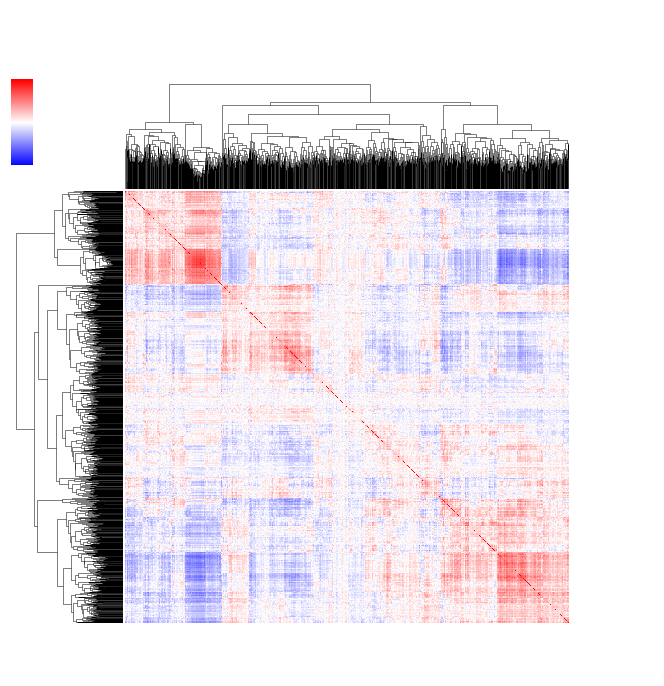

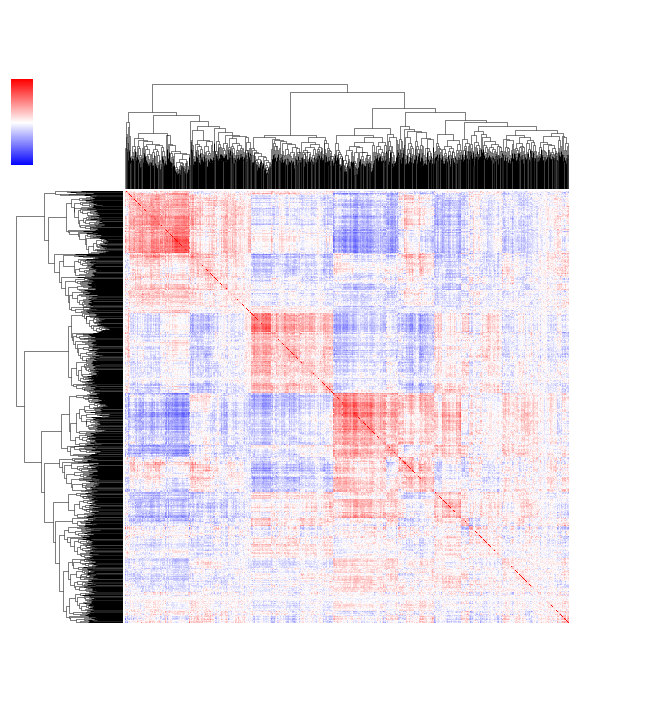

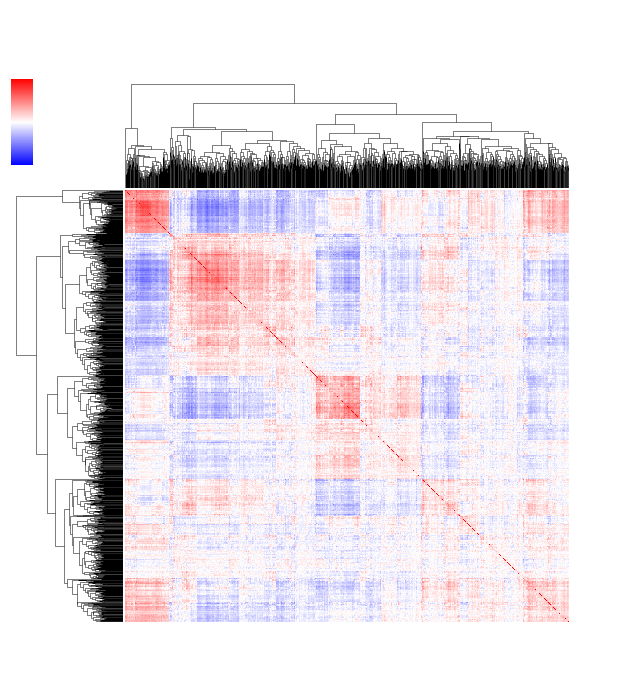

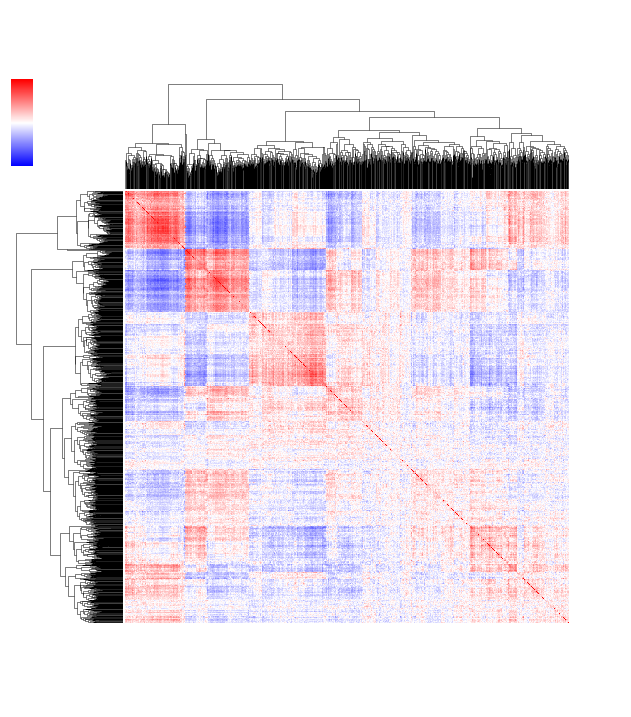

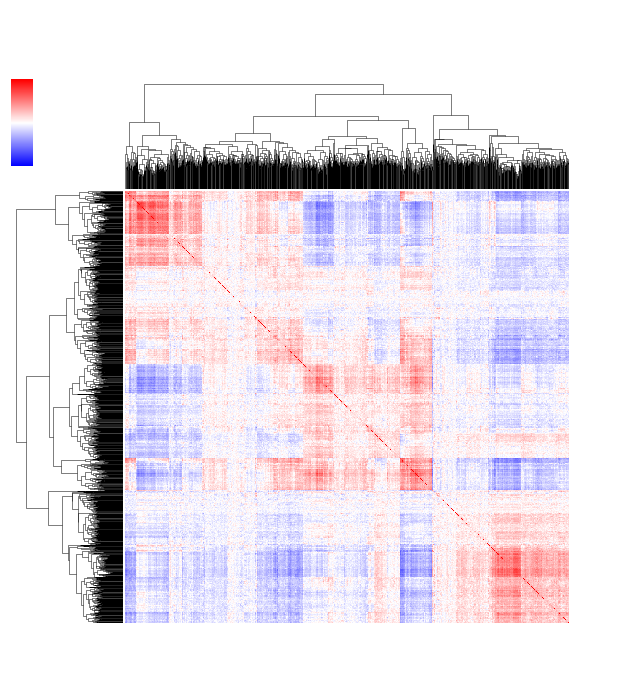

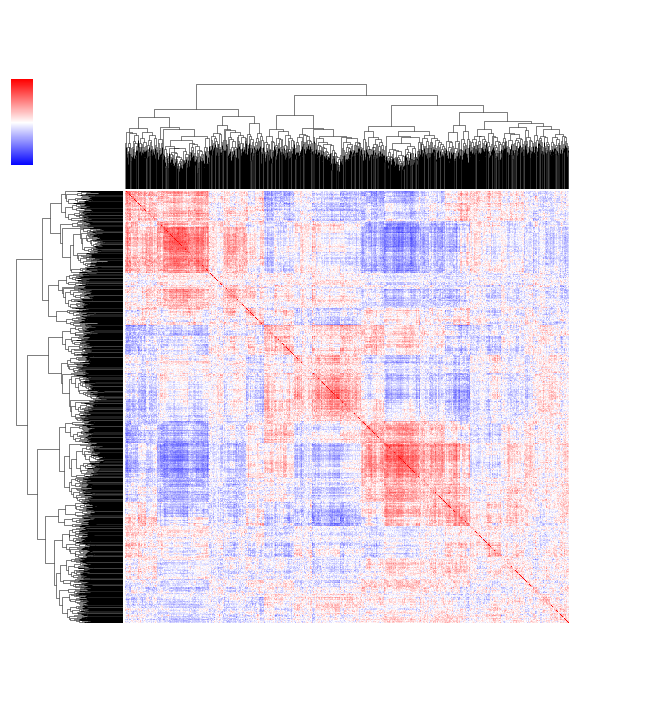

KeyError: "Index(['LS-15546_S56_E1-50', 'LS-15546_S74_E1-50', 'LS-15546_S75_E1-50',\n       'LS-15546_S95_E1-50', 'SQ-80015_S25_E1-50', 'SM-D9D14_S40_E1-50',\n       'SM-GE92Z_S113_E1-50', 'SM-GE664_S093_E1-50', 'LS-15389_S33_E1-50',\n       'LS-15318_S63_E2-50', 'LS-15534_S16_E12-50', 'SM-GE63V_S064_E1-50',\n       'SM-GE65Y_S155_E1-50', 'SM-GE8ZL_S114_E1-50', 'SM-GE5UB_S081_E1-50',\n       'SM-GE65T_S074_E1-50', 'SM-GE65L_S238_E1-50'],\n      dtype='object', name='sample_name') not in index"

In [39]:
for cluster in metadata['cell_type_alias_label'].unique():
    corraltion_matrix = np.corrcoef(filtered_counts[metadata[metadata['cell_type_alias_label']==cluster].index])
    g = sns.clustermap(pd.DataFrame(corraltion_matrix,index=filtered_genes,columns=filtered_genes),vmax=1,vmin=-1,cmap='bwr',center=0)
    g.fig.suptitle('Covariance Matrix '+cluster)
    plt.show()